#### OBJETIVO NOTEBOOK
- EDA extenso y tratamiento de outliers

# IMPORTAR LIBRERIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTAR DATOS

**A partir del pkl sin nulos guardado en la carpeta df_clean**

In [ ]:
# conexion a drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df= pd.read_pickle('/content/drive/MyDrive/ACADEMIC/MASTER DATA SCIENCE & AI (NUCLIO DIGITAL SCHOOL)/TFM/TFM SP500 COMPARTIDO/DATA_HIST/df_sp500_sin_nulos_09022025.pkl')

In [ ]:
# guardo csv para carga en PBI
#ruta_guardado = '/content/drive/MyDrive/ACADEMIC/MASTER DATA SCIENCE & AI (NUCLIO DIGITAL SCHOOL)/TFM/TFM SP500 COMPARTIDO/df_clean/df_clean_interpolation.csv'
#df.to_csv(ruta_guardado, index=False, sep=';', decimal=',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5259 entries, 0 to 5297
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ticker                                 5259 non-null   object 
 1   year                                   5259 non-null   int64  
 2   totalRevenue                           5259 non-null   float64
 3   depreciationAndAmortization            5259 non-null   float64
 4   ebitda                                 5259 non-null   float64
 5   netIncome                              5259 non-null   float64
 6   cashAndCashEquivalentsAtCarryingValue  5259 non-null   float64
 7   totalLiabilities                       5259 non-null   float64
 8   totalShareholderEquity                 5259 non-null   float64
 9   commonStockSharesOutstanding           5259 non-null   float64
 10  shortLongTermDebtTotal                 5259 non-null   float64
 11  capitalEx

In [ ]:
pd.set_option('display.float_format', '{:.0f}'.format)

Validamos que ya no tenemos nulos, tambien validamos que no tengamos mas de un registro por año por cada ticker, ya que queremos que nuestros datos tengan granularidad anual

In [ ]:
# miramos si tenemos duplicatos por ticker y año
duplicates = df.groupby(["ticker", "year"]).size().reset_index(name='count')

In [ ]:
duplicates[duplicates['count']>1]

,ticker,year,count


In [ ]:
# tickers con mas de un sector?
tickers_sector =  df.groupby("ticker")['sector'].nunique()
tickers_sector[tickers_sector>1]

,sector
ticker,


# ANALISIS UNIVARIABLE

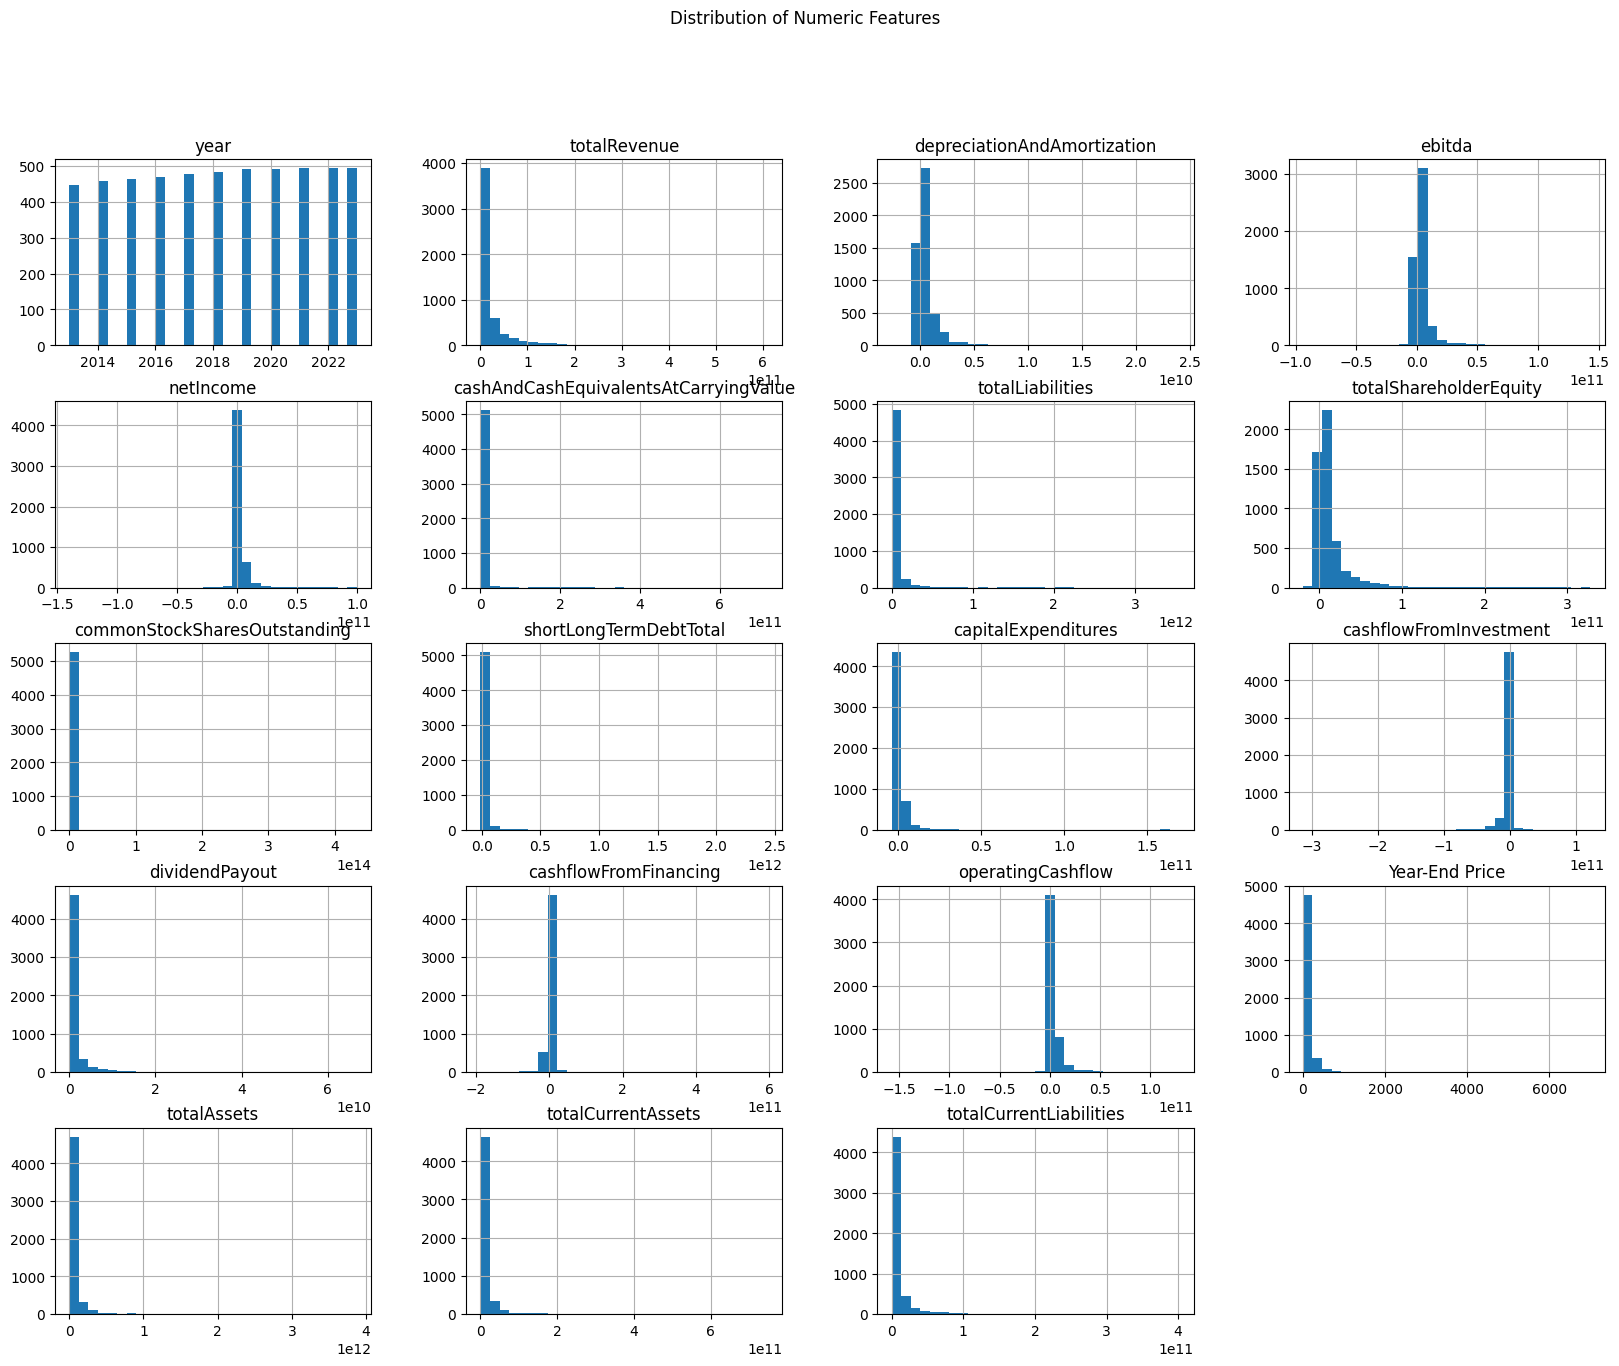

In [ ]:
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution of Numeric Features')
plt.show()

In [ ]:
df.describe()

,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,shortLongTermDebtTotal,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,totalAssets,totalCurrentAssets,totalCurrentLiabilities
count,5259,5259,5259,5259,5259,5259,5259,5259,5259,5259,5259,5259,5259,5259,5259,5259,5259,5259,5259
mean,2018,24354220657,770147926,4326083328,2381882531,5624793205,57654271500,15402544441,145129190684,15186391919,1922010442,-3061689418,1074729222,-626939093,4178415432,112,73244442304,14110525266,9398721512
std,3,47852722214,2013186888,9672729058,6323700158,29428097288,218042214116,31372162804,7477699091433,50880056500,8055322646,11824917693,2449769359,15529635573,10160331123,230,242220891293,40132789762,22915392235
min,2013,0,-2592119000,-93976000000,-140007000000,0,0,-19790000000,100,-11788000000,-3597955000,-313291000000,0,-187511000000,-157354000000,0,4968000,51000,19000
25%,2015,4112700000,51000000,766111000,377900000,320650000,4579132500,2385558000,137073794,1496014000,135483500,-2642700000,96835500,-1761468500,768000000,37,7721350000,1754855000,1001831500
50%,2018,9518202000,207000000,1730900000,931000000,956000000,12482000000,6178000000,295000000,4898800000,448555000,-803962000,381000000,-485000000,1663539000,65,19723000000,4007693000,2769600000
75%,2021,21364700000,635000000,4121500000,2318000000,2848000000,34677000000,14552650000,612000000,12867000000,1397419000,-221950000,960500000,103410500,3953500000,121,49403000000,10448000000,7873500000
max,2023,611289000000,24040000000,143248000000,99803000000,721134000000,3547515000000,327878000000,433000000000000,2442288000000,169212000000,122554000000,66703230000,596645000000,128593000000,7000,3875393000000,749522000000,401490000000


In [ ]:
#old
#df.describe()

In [ ]:
# old
# df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5259 entries, 0 to 5297
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ticker                                 5259 non-null   object 
 1   year                                   5259 non-null   int64  
 2   totalRevenue                           5259 non-null   float64
 3   depreciationAndAmortization            5259 non-null   float64
 4   ebitda                                 5259 non-null   float64
 5   netIncome                              5259 non-null   float64
 6   cashAndCashEquivalentsAtCarryingValue  5259 non-null   float64
 7   totalLiabilities                       5259 non-null   float64
 8   totalShareholderEquity                 5259 non-null   float64
 9   commonStockSharesOutstanding           5259 non-null   float64
 10  shortLongTermDebtTotal                 5259 non-null   float64
 11  capitalEx

In [ ]:
TARGET = "Year-End Price"
TRAIN_COLUMNS = df.columns[df.columns!=TARGET].tolist()

**YEAR-END-PRICE**

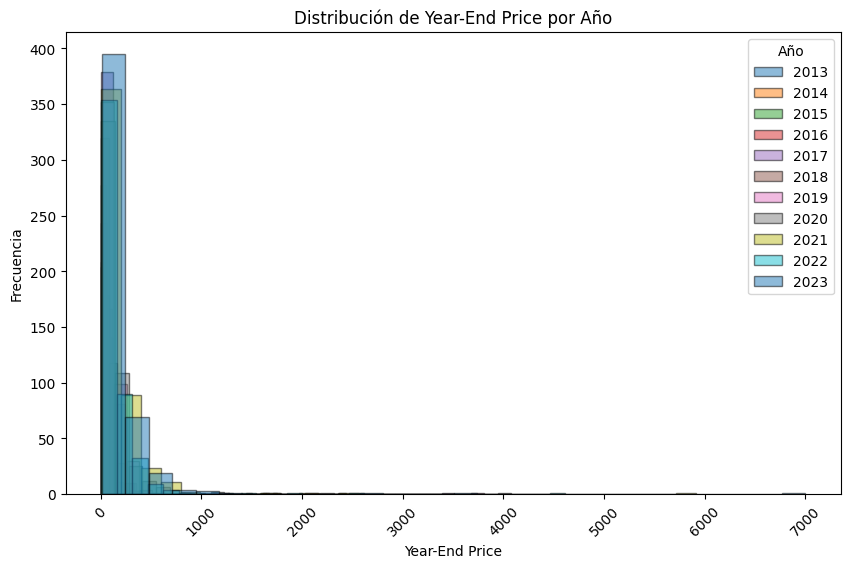

In [ ]:
# target por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset[TARGET], bins=30, edgecolor='black', alpha=0.5, label=str(year))


plt.title('Distribución de Year-End Price por Año')
plt.xlabel('Year-End Price')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

La mayoria de tickers tienen un precio por accion que está entre 1USD y 10 USD Aprox. Validamos que los tickers con un year end price <1 no sea un error y confirmarmos que efectivamente estos tengan un precio inferior a 1 durante estos años.

In [ ]:
pd.set_option('display.float_format', '{:.10f}'.format)


In [ ]:
df[df[TARGET]<1][TARGET]

,Year-End Price
3625,0.3777848318
3626,0.4813084274
3627,0.8042536093


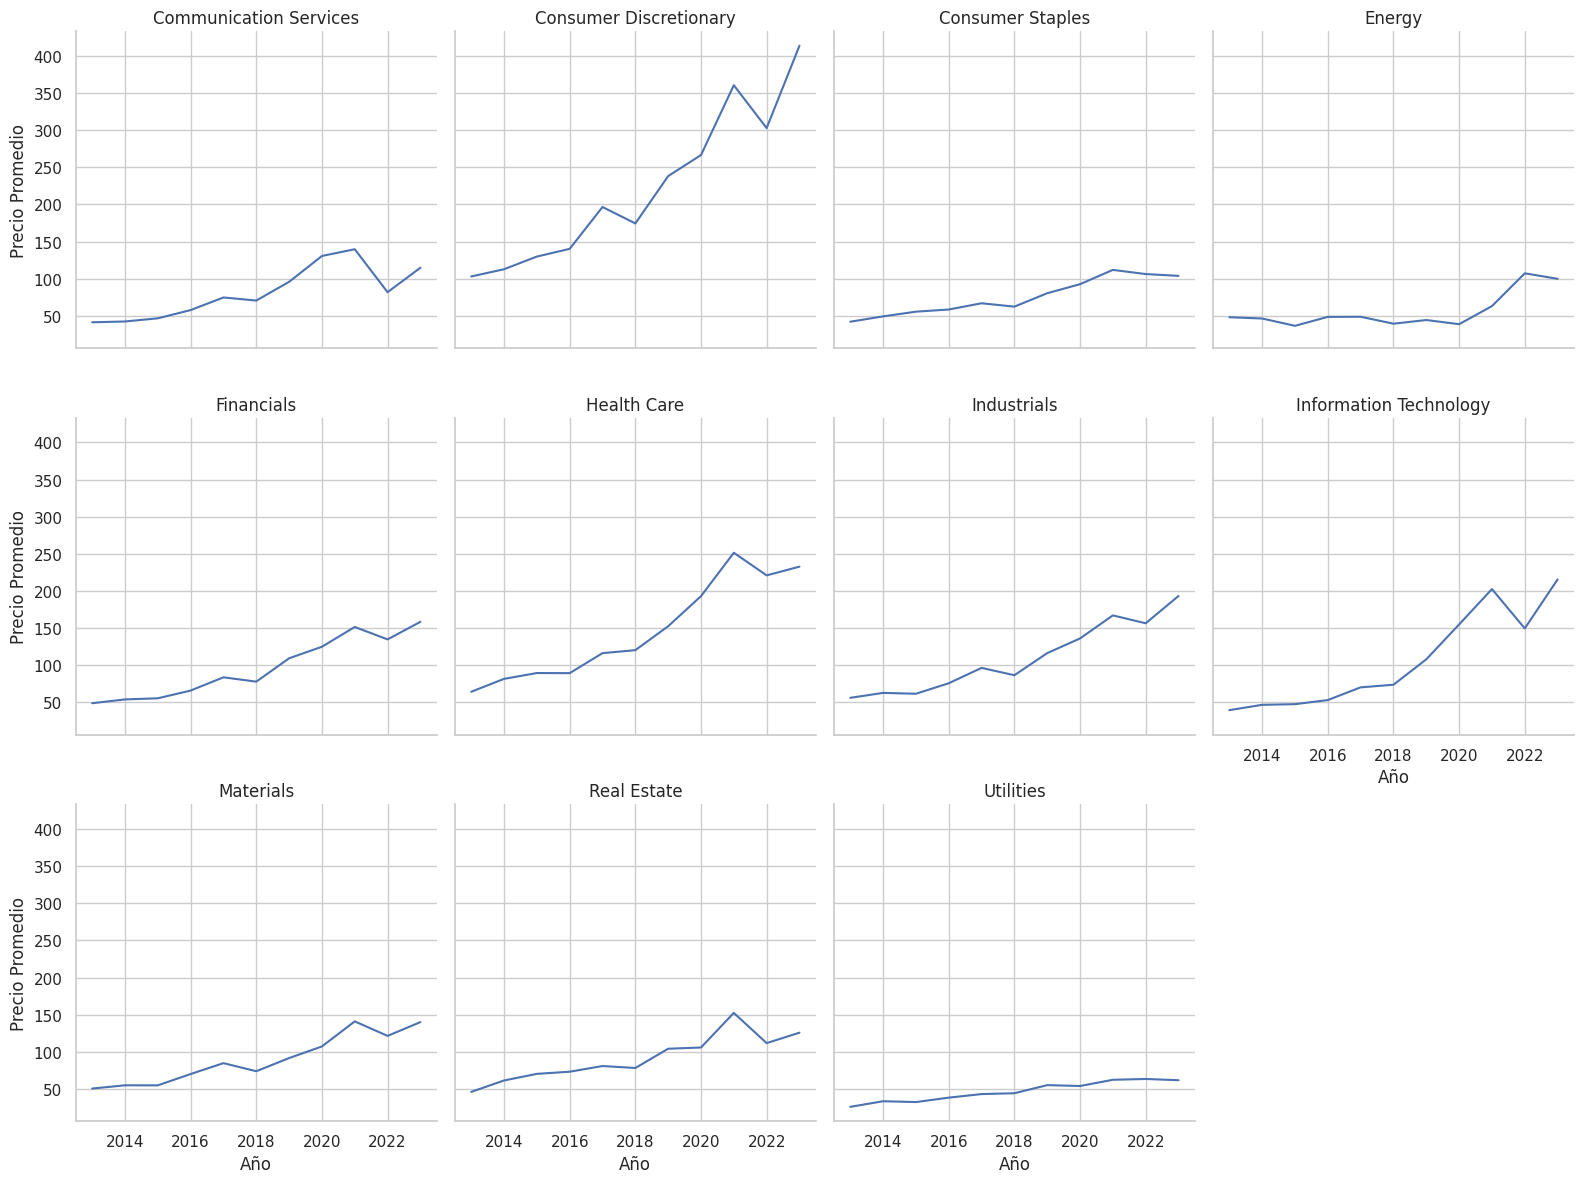

In [ ]:
# agrupar por year y sector , y calcular el promedio de precio
df_grouped = df.groupby(['year', 'sector'], as_index=False)["Year-End Price"].mean()

# crear un grafico para cada sector

# Crear un gráfico para cada sector
sns.set(style="whitegrid")
g = sns.FacetGrid(df_grouped, col="sector", col_wrap=4, height=4)  # Ajusta el tamaño de los gráficos según sea necesario
g.map(sns.lineplot, "year", "Year-End Price")

# Personalizar título y etiquetas
g.set_axis_labels("Año", "Precio Promedio")
g.set_titles("{col_name}")

plt.show()

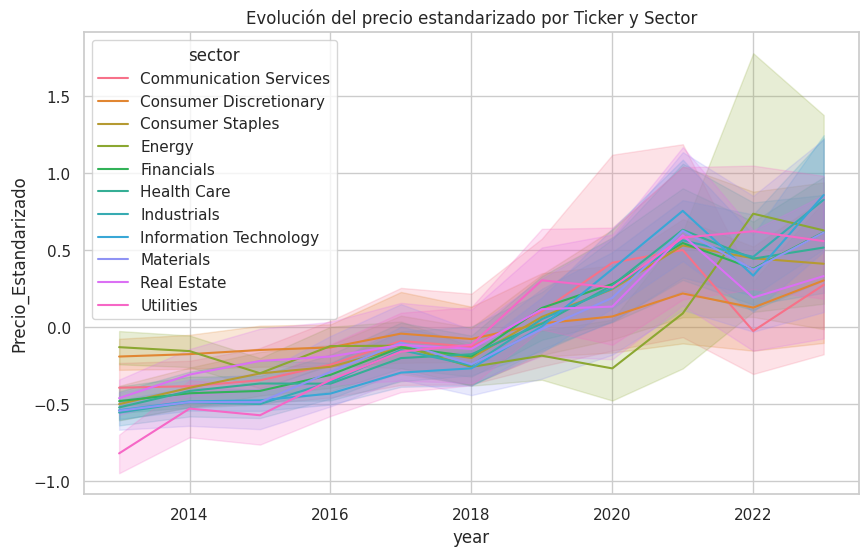

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar y calcular la media o estandarizar
df_grouped = df.groupby(['year', 'sector', 'ticker'], as_index=False)["Year-End Price"].mean()

# Estandarizar el precio (opcional)
df_grouped['Precio_Estandarizado'] = df_grouped.groupby('sector')["Year-End Price"].transform(lambda x: (x - x.mean()) / x.std())

# Crear un gráfico de líneas por Sector
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x="year", y="Precio_Estandarizado", hue="sector", markers=True)
plt.title('Evolución del precio estandarizado por Ticker y Sector')
plt.show()

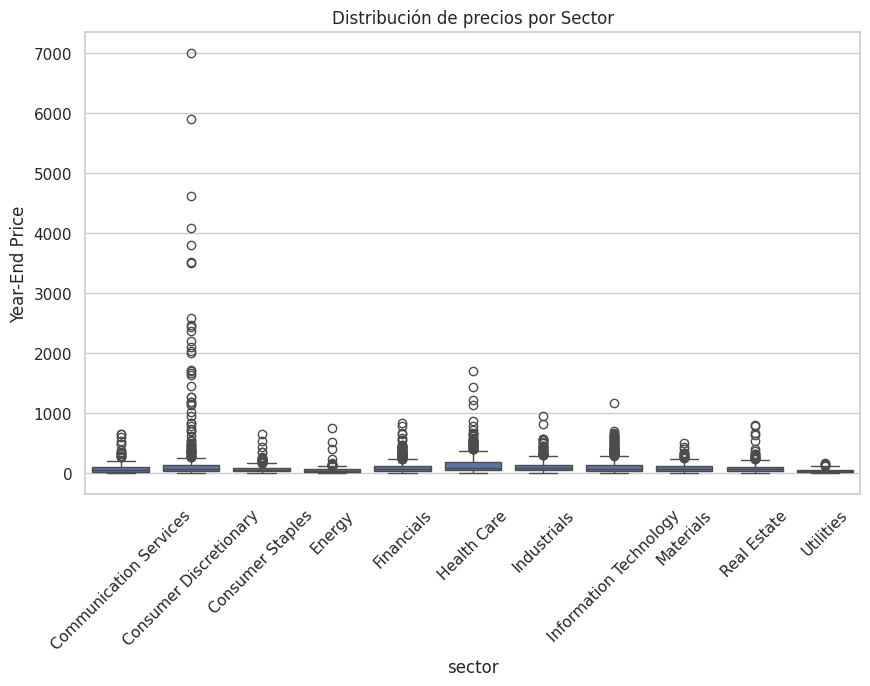

In [ ]:
# visualizar distribución precios por sector

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_grouped, x='sector', y="Year-End Price")
plt.title('Distribución de precios por Sector')
plt.xticks(rotation=45)
plt.show()

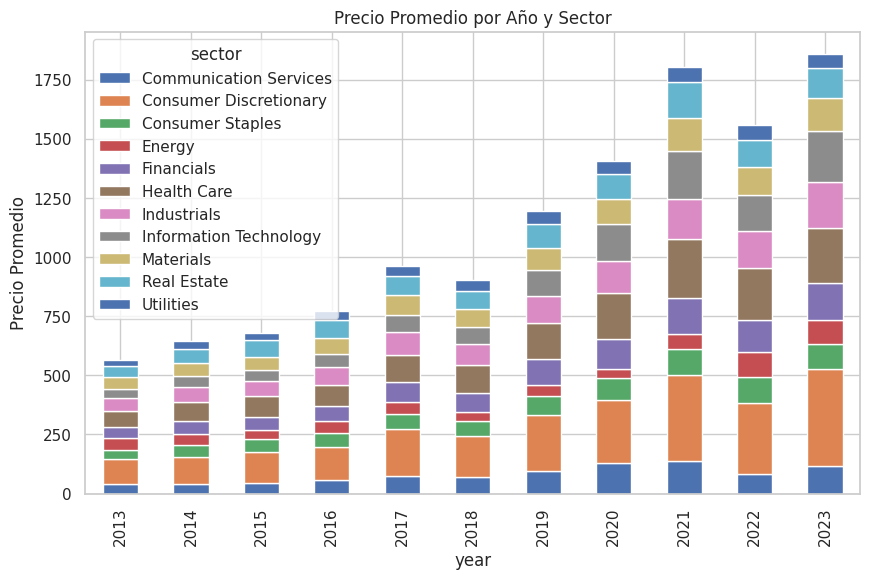

In [ ]:
# Gráfico de barras apiladas por sector
df_grouped_pivot = df_grouped.pivot_table(index='year', columns='sector', values="Year-End Price", aggfunc='mean')
df_grouped_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Precio Promedio por Año y Sector')
plt.ylabel('Precio Promedio')
plt.show()

In [ ]:
df_grouped

,year,sector,ticker,Year-End Price,Precio_Estandarizado
0,2013,Communication Services,CHTR,136.7600000000,0.4750090171
1,2013,Communication Services,CMCSA,20.6706758151,-0.5814938236
2,2013,Communication Services,EA,22.4092731802,-0.5656712398
3,2013,Communication Services,IPG,12.0963096987,-0.6595272019
4,2013,Communication Services,LYV,19.7600000000,-0.5897816794
...,...,...,...,...,...
5254,2023,Utilities,SO,67.6488253291,0.7860481115
5255,2023,Utilities,SRE,72.4263917303,0.9698787853
5256,2023,Utilities,VST,38.2175200809,-0.3464064104
5257,2023,Utilities,WEC,80.9852556266,1.2992058076


**TOTAL REVENUE**

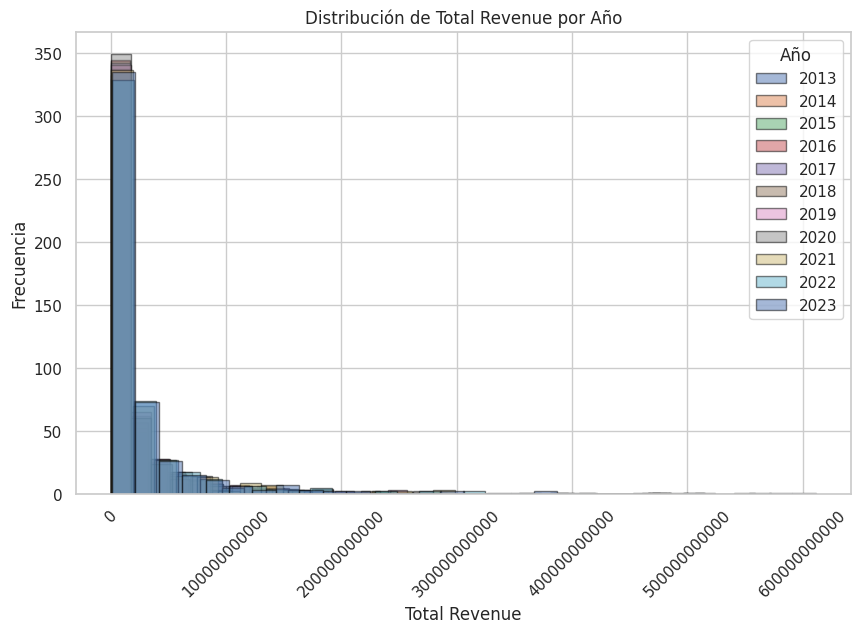

In [ ]:
# revenue por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['totalRevenue'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de Total Revenue por Año')
plt.xlabel('Total Revenue')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

In [ ]:
df[df['totalRevenue']<3000000]

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
1775,ETN,2013,0.0000000000,437000000.0000000000,3615000000.0000000000,1861000000.0000000000,915000000.0000000000,18700000000.0000000000,16791000000.0000000000,475100000.0000000000,...,614000000.0000000000,-202000000.0000000000,796000000.0000000000,-1736000000.0000000000,2285000000.0000000000,56.7088872234,Industrials,35491000000.0000000000,8731000000.0000000000,4914000000.0000000000
1776,ETN,2014,0.0000000000,424000000.0000000000,3736000000.0000000000,1793000000.0000000000,781000000.0000000000,17743000000.0000000000,15786000000.0000000000,467900000.0000000000,...,632000000.0000000000,143000000.0000000000,929000000.0000000000,-2130000000.0000000000,1878000000.0000000000,52.0448431182,Industrials,33487000000.0000000000,8100000000.0000000000,5355000000.0000000000
1777,ETN,2015,0.0000000000,401000000.0000000000,3534000000.0000000000,1979000000.0000000000,268000000.0000000000,15810000000.0000000000,15186000000.0000000000,458800000.0000000000,...,506000000.0000000000,-575000000.0000000000,1026000000.0000000000,-2305000000.0000000000,2409000000.0000000000,41.2486257556,Industrials,31059000000.0000000000,6616000000.0000000000,4625000000.0000000000
1778,ETN,2016,0.0000000000,392000000.0000000000,3350000000.0000000000,1922000000.0000000000,543000000.0000000000,15522000000.0000000000,14954000000.0000000000,449400000.0000000000,...,497000000.0000000000,-529000000.0000000000,1037000000.0000000000,-1738000000.0000000000,2570000000.0000000000,55.2068431336,Industrials,30476000000.0000000000,7033000000.0000000000,5485000000.0000000000
3091,MAA,2013,70000.0000000000,186979000.0000000000,153214000.0000000000,234560000.0000000000,89333000.0000000000,6945436000.0000000000,108000.0000000000,74830726.0000000000,...,53439000.0000000000,-330280000.0000000000,140697000.0000000000,-100546000.0000000000,119279000.0000000000,40.8755274244,Real Estate,6841925000.0000000000,172455000.0000000000,221257000.0000000000
3092,MAA,2014,300000.0000000000,301811000.0000000000,238571000.0000000000,-24500000.0000000000,25401000.0000000000,3773306000.0000000000,2896435000.0000000000,75267675.0000000000,...,90201000.0000000000,-203764000.0000000000,219158000.0000000000,-244294000.0000000000,-24500000.0000000000,52.4919627920,Real Estate,4968000.0000000000,90034000.0000000000,224873000.0000000000
3093,MAA,2015,154000.0000000000,294520000.0000000000,290540000.0000000000,-42646000.0000000000,37559000.0000000000,3681708000.0000000000,3000347000.0000000000,75408571.0000000000,...,88486000.0000000000,-136215000.0000000000,232079000.0000000000,-316600000.0000000000,-42646000.0000000000,66.3815864343,Real Estate,7338000.0000000000,63641000.0000000000,232159000.0000000000
4720,TROW,2013,700000.0000000000,91000000.0000000000,1792900000.0000000000,1047700000.0000000000,1398000000.0000000000,215000000.0000000000,4818100000.0000000000,262073000.0000000000,...,105800000.0000000000,-437500000.0000000000,396700000.0000000000,-276800000.0000000000,1233200000.0000000000,57.2568499590,Financials,5033100000.0000000000,1398000000.0000000000,142600000.0000000000


In [ ]:
df[df['totalRevenue']>600000000000]

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
5165,WMT,2023,611289000000.0000000000,596000000.0000000000,20043000000.0000000000,11680000000.0000000000,8625000000.0000000000,166504000000.0000000000,76693000000.0000000000,2697000000.0000000000,...,16857000000.0000000000,-17722000000.0000000000,6558000000.0000000000,-17039000000.0000000000,28841000000.0000000000,51.9313588742,Consumer Staples,243197000000.0000000000,75655000000.0000000000,92198000000.0000000000


In [ ]:
df[df['ticker']=='ETN'][['ticker','year', 'totalRevenue']]

,ticker,year,totalRevenue
1775,ETN,2013,0.0000000000
1776,ETN,2014,0.0000000000
1777,ETN,2015,0.0000000000
1778,ETN,2016,0.0000000000
1779,ETN,2017,21235000000.0000000000
1780,ETN,2018,21338000000.0000000000
1781,ETN,2019,21230000000.0000000000
1782,ETN,2020,18008000000.0000000000
1783,ETN,2021,20114000000.0000000000
1784,ETN,2022,20562000000.0000000000


In [ ]:
df_ETN = df[df['ticker']=='ETN']

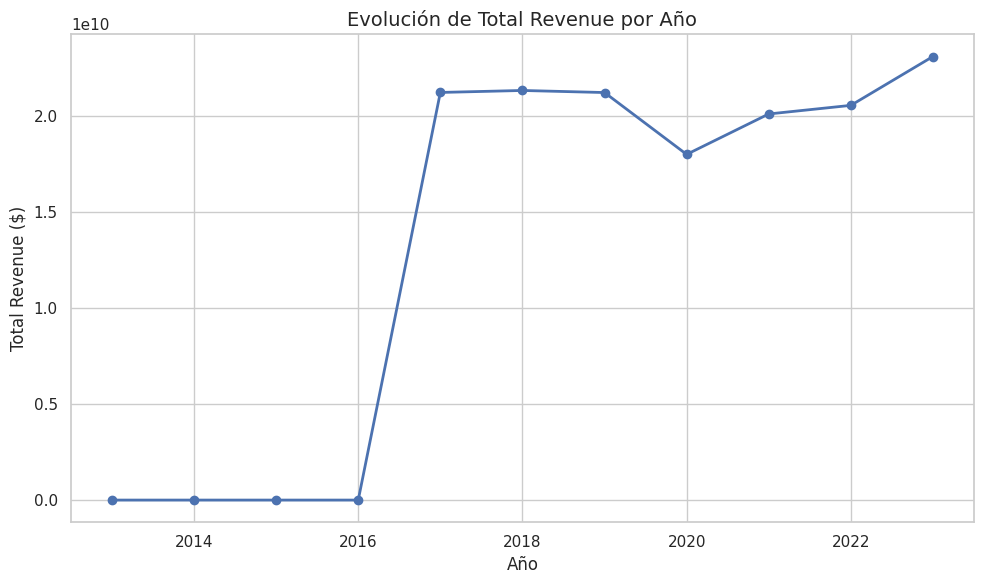

In [ ]:
# Crear gráfico de líneas
plt.figure(figsize=(10,6))
plt.plot(df_ETN['year'], df_ETN['totalRevenue'], marker='o', color='b', linestyle='-', linewidth=2)

# Personalizar el gráfico
plt.title('Evolución de Total Revenue por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**TRANFORMACION!** Vamos a reemplazar los valores de 'Total Revenue' que están a 0 con el promedio de TotalRevenue de los años con valores distintos a 0 a partir de un diccionario

In [ ]:
# diccionario con los valores EBITDA para OXY
totalrevenue_ETN = {
    2013: 22046000000,
    2014: 22552000000,
    2015: 20855000000,
    2016: 19747000000,
}

# iteramos sobre el diccionario y actualizamos la columna ebitda donde este nula para cada año

for year, totalRevenue in totalrevenue_ETN.items():
    # Condición: ticker es 'ETN', el año es el que nos interesa y 'totalrevenue' es 0
    condition = (df['ticker'] == 'ETN') & (df['year'] == year) & (df['totalRevenue'] == 0)
    df.loc[condition, 'totalRevenue'] = totalRevenue


In [ ]:
df_ETN = df[df['ticker']=='ETN']

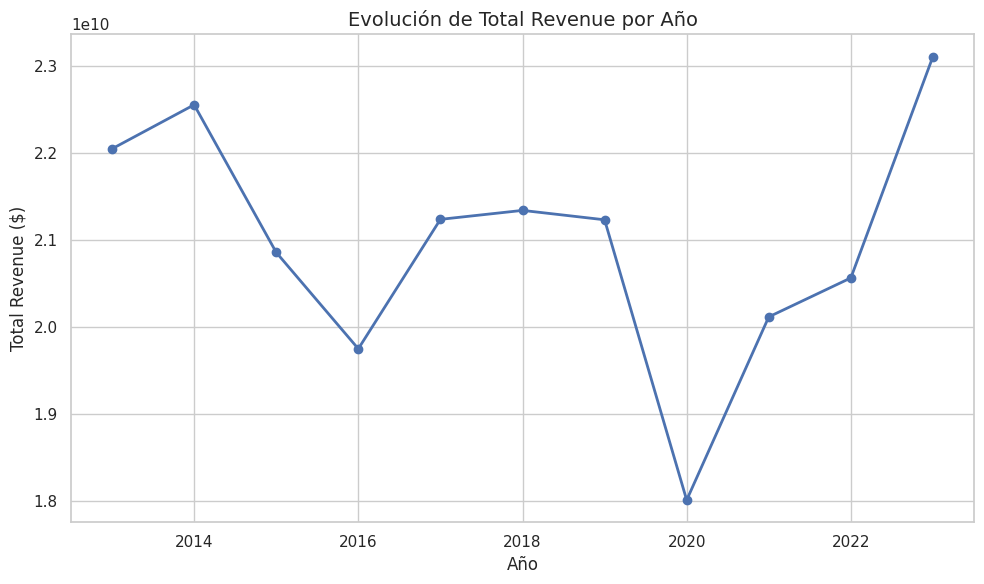

In [ ]:
# Crear gráfico de líneas
plt.figure(figsize=(10,6))
plt.plot(df_ETN['year'], df_ETN['totalRevenue'], marker='o', color='b', linestyle='-', linewidth=2)

# Personalizar el gráfico
plt.title('Evolución de Total Revenue por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**depreciationAndAmortization**

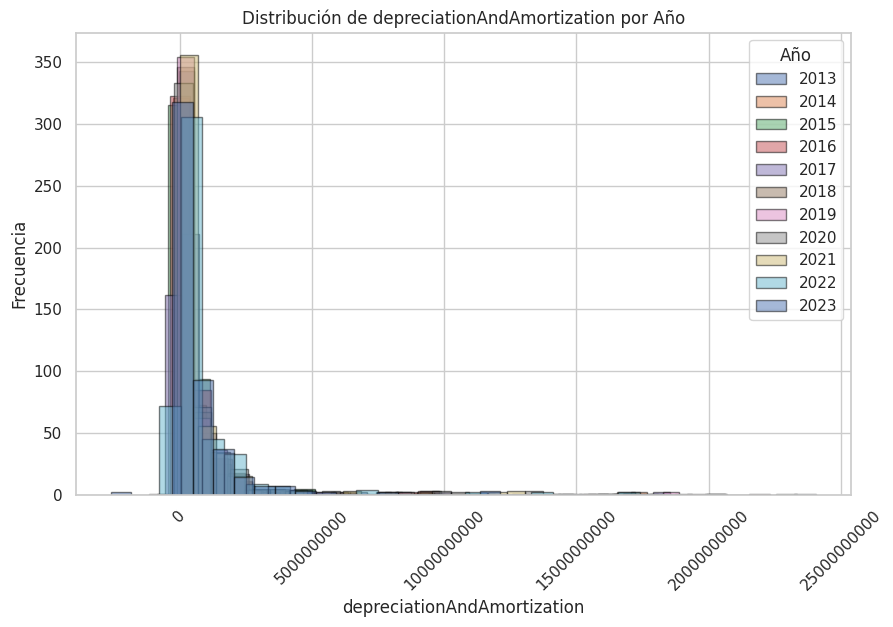

In [ ]:
# revenue por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['depreciationAndAmortization'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de depreciationAndAmortization por Año')
plt.xlabel('depreciationAndAmortization')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

In [ ]:
df[df['depreciationAndAmortization']<0]

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
136,AEP,2013,14813500000.0000000000,-21000000.0000000000,3026700000.0000000000,1480000000.0000000000,117500000.0000000000,40328000000.0000000000,16085000000.0000000000,487416592.0000000000,...,3656000000.0000000000,-3817800000.0000000000,954000000.0000000000,-438700000.0000000000,4096200000.0000000000,31.4663200593,Utilities,56321000000.0000000000,4310000000.0000000000,6112000000.0000000000
137,AEP,2014,16378600000.0000000000,-37000000.0000000000,3367600000.0000000000,1634000000.0000000000,162500000.0000000000,42720100000.0000000000,16820200000.0000000000,489288937.0000000000,...,65000000.0000000000,-4405900000.0000000000,998000000.0000000000,-150900000.0000000000,4602400000.0000000000,42.5021275141,Utilities,59544600000.0000000000,4478100000.0000000000,7966600000.0000000000
138,AEP,2015,16453200000.0000000000,-49400000.0000000000,3791200000.0000000000,2047100000.0000000000,176400000.0000000000,43778200000.0000000000,17891700000.0000000000,490896143.0000000000,...,5300000.0000000000,-4564000000.0000000000,1059000000.0000000000,-661700000.0000000000,4748700000.0000000000,42.3762028065,Utilities,61683100000.0000000000,4072400000.0000000000,7108500000.0000000000
139,AEP,2016,16380100000.0000000000,-17000000.0000000000,1397400000.0000000000,610900000.0000000000,210500000.0000000000,46047600000.0000000000,17397000000.0000000000,491713069.0000000000,...,107900000.0000000000,-4989100000.0000000000,1121000000.0000000000,503900000.0000000000,4521800000.0000000000,47.4250274475,Utilities,63467700000.0000000000,6033900000.0000000000,9498000000.0000000000
140,AEP,2017,15424900000.0000000000,-29500000.0000000000,3747800000.0000000000,1912600000.0000000000,214600000.0000000000,46403600000.0000000000,18287000000.0000000000,491913675.0000000000,...,6800000.0000000000,-3656400000.0000000000,1191900000.0000000000,-604900000.0000000000,4270400000.0000000000,57.3504603940,Utilities,64729100000.0000000000,4253100000.0000000000,8271300000.0000000000
141,AEP,2018,16195700000.0000000000,-59100000.0000000000,2964400000.0000000000,1923800000.0000000000,234100000.0000000000,49634600000.0000000000,19028400000.0000000000,493150032.0000000000,...,14600000.0000000000,-6353600000.0000000000,1255500000.0000000000,1161900000.0000000000,5223200000.0000000000,60.4426835096,Utilities,68802800000.0000000000,4113900000.0000000000,8648800000.0000000000
142,AEP,2019,15561400000.0000000000,-3000000.0000000000,2977700000.0000000000,1921100000.0000000000,246800000.0000000000,55870500000.0000000000,19632200000.0000000000,493977380.0000000000,...,918400000.0000000000,-7144500000.0000000000,1350000000.0000000000,2862900000.0000000000,4270100000.0000000000,78.8934213815,Utilities,75892300000.0000000000,4077800000.0000000000,10299100000.0000000000
1613,EG,2016,5794346000.0000000000,-1157272000.0000000000,1185239000.0000000000,996344000.0000000000,481922000.0000000000,13246108000.0000000000,8075396000.0000000000,68871000.0000000000,...,4823484000.0000000000,-657873000.0000000000,195384000.0000000000,-581516000.0000000000,1383600000.0000000000,180.6472354100,Financials,21321504000.0000000000,158597000.0000000000,12612932000.0000000000
1614,EG,2017,6622298000.0000000000,-465877000.0000000000,474408000.0000000000,468968000.0000000000,635067000.0000000000,15222560000.0000000000,8340736000.0000000000,69044000.0000000000,...,2440342500.0000000000,-732577000.0000000000,207242000.0000000000,-275458000.0000000000,1162693000.0000000000,188.6530454855,Financials,23563296000.0000000000,183970000.0000000000,14589165000.0000000000
1619,EG,2022,12060000000.0000000000,-790100000.0000000000,689000000.0000000000,597000000.0000000000,279000000.

In [ ]:
df[df['ticker']=='AEP']

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
136,AEP,2013,14813500000.0000000000,-21000000.0000000000,3026700000.0000000000,1480000000.0000000000,117500000.0000000000,40328000000.0000000000,16085000000.0000000000,487416592.0000000000,...,3656000000.0000000000,-3817800000.0000000000,954000000.0000000000,-438700000.0000000000,4096200000.0000000000,31.4663200593,Utilities,56321000000.0000000000,4310000000.0000000000,6112000000.0000000000
137,AEP,2014,16378600000.0000000000,-37000000.0000000000,3367600000.0000000000,1634000000.0000000000,162500000.0000000000,42720100000.0000000000,16820200000.0000000000,489288937.0000000000,...,65000000.0000000000,-4405900000.0000000000,998000000.0000000000,-150900000.0000000000,4602400000.0000000000,42.5021275141,Utilities,59544600000.0000000000,4478100000.0000000000,7966600000.0000000000
138,AEP,2015,16453200000.0000000000,-49400000.0000000000,3791200000.0000000000,2047100000.0000000000,176400000.0000000000,43778200000.0000000000,17891700000.0000000000,490896143.0000000000,...,5300000.0000000000,-4564000000.0000000000,1059000000.0000000000,-661700000.0000000000,4748700000.0000000000,42.3762028065,Utilities,61683100000.0000000000,4072400000.0000000000,7108500000.0000000000
139,AEP,2016,16380100000.0000000000,-17000000.0000000000,1397400000.0000000000,610900000.0000000000,210500000.0000000000,46047600000.0000000000,17397000000.0000000000,491713069.0000000000,...,107900000.0000000000,-4989100000.0000000000,1121000000.0000000000,503900000.0000000000,4521800000.0000000000,47.4250274475,Utilities,63467700000.0000000000,6033900000.0000000000,9498000000.0000000000
140,AEP,2017,15424900000.0000000000,-29500000.0000000000,3747800000.0000000000,1912600000.0000000000,214600000.0000000000,46403600000.0000000000,18287000000.0000000000,491913675.0000000000,...,6800000.0000000000,-3656400000.0000000000,1191900000.0000000000,-604900000.0000000000,4270400000.0000000000,57.3504603940,Utilities,64729100000.0000000000,4253100000.0000000000,8271300000.0000000000
141,AEP,2018,16195700000.0000000000,-59100000.0000000000,2964400000.0000000000,1923800000.0000000000,234100000.0000000000,49634600000.0000000000,19028400000.0000000000,493150032.0000000000,...,14600000.0000000000,-6353600000.0000000000,1255500000.0000000000,1161900000.0000000000,5223200000.0000000000,60.4426835096,Utilities,68802800000.0000000000,4113900000.0000000000,8648800000.0000000000
142,AEP,2019,15561400000.0000000000,-3000000.0000000000,2977700000.0000000000,1921100000.0000000000,246800000.0000000000,55870500000.0000000000,19632200000.0000000000,493977380.0000000000,...,918400000.0000000000,-7144500000.0000000000,1350000000.0000000000,2862900000.0000000000,4270100000.0000000000,78.8934213815,Utilities,75892300000.0000000000,4077800000.0000000000,10299100000.0000000000
143,AEP,2020,14918500000.0000000000,18600000.0000000000,3424900000.0000000000,2200100000.0000000000,392700000.0000000000,59937500000.0000000000,20550900000.0000000000,496435322.0000000000,...,0.0000000000,-6233900000.0000000000,1424900000.0000000000,2406700000.0000000000,3832900000.0000000000,71.7685543375,Utilities,80757200000.0000000000,4351500000.0000000000,9926700000.0000000000
144,AEP,2021,16792000000.0000000000,6700000.0000000000,3809400000.0000000000,2488100000.0000000000,403400000.0000000000,64945200000.0000000000,22433200000.0000000000,503745166.0000000000,...,5659600000.0000000000,-6433900000.0000000000,1519500000.0000000000,2607100000.0000000000,3839900000.0000000000,79.4387518903,Utilities,87668700000.0000000000,7809200000.0000000000,12426700000.0000000000
145,AEP,2022,19639500000.0000000000,164300000.0000000000,3873000000.0000000000,2307200000.0000000000,509400000.0000

**TRANSFORMACION** : pendiente aplicar a todos los demas

In [ ]:
df.loc[df["ticker"] == "AEP", "depreciationAndAmortization"] = 0.0

In [ ]:
# imputar los valores manualmente
depreciacion_amortizacion_aep = {
    2013: 1440000057,
    2014: 1570000052,
    2015: 1670000076,
    2016: 1690000057,
    2017: 1710000038,
    2018: 1960000038,
    2019: 2200000048,
    2020: 2490000010,
    2021: 2720000029,
    2022: 3070000023,
    2023: 2930000067
}

# iteramos sobre el diccionario y actualizamos la columna ebitda donde este nula para cada año

for year, Amort in depreciacion_amortizacion_aep.items():
    # Condición: ticker es 'AEP', el año es el que nos interesa y 'totalrevenue' es 0
    condition = (df['ticker'] == 'AEP') & (df['year'] == year)
    df.loc[condition, 'depreciationAndAmortization'] = Amort

In [ ]:
df[df['ticker']=='AEP']

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
136,AEP,2013,14813500000.0000000000,1440000057.0000000000,3026700000.0000000000,1480000000.0000000000,117500000.0000000000,40328000000.0000000000,16085000000.0000000000,487416592.0000000000,...,3656000000.0000000000,-3817800000.0000000000,954000000.0000000000,-438700000.0000000000,4096200000.0000000000,31.4663200593,Utilities,56321000000.0000000000,4310000000.0000000000,6112000000.0000000000
137,AEP,2014,16378600000.0000000000,1570000052.0000000000,3367600000.0000000000,1634000000.0000000000,162500000.0000000000,42720100000.0000000000,16820200000.0000000000,489288937.0000000000,...,65000000.0000000000,-4405900000.0000000000,998000000.0000000000,-150900000.0000000000,4602400000.0000000000,42.5021275141,Utilities,59544600000.0000000000,4478100000.0000000000,7966600000.0000000000
138,AEP,2015,16453200000.0000000000,1670000076.0000000000,3791200000.0000000000,2047100000.0000000000,176400000.0000000000,43778200000.0000000000,17891700000.0000000000,490896143.0000000000,...,5300000.0000000000,-4564000000.0000000000,1059000000.0000000000,-661700000.0000000000,4748700000.0000000000,42.3762028065,Utilities,61683100000.0000000000,4072400000.0000000000,7108500000.0000000000
139,AEP,2016,16380100000.0000000000,1690000057.0000000000,1397400000.0000000000,610900000.0000000000,210500000.0000000000,46047600000.0000000000,17397000000.0000000000,491713069.0000000000,...,107900000.0000000000,-4989100000.0000000000,1121000000.0000000000,503900000.0000000000,4521800000.0000000000,47.4250274475,Utilities,63467700000.0000000000,6033900000.0000000000,9498000000.0000000000
140,AEP,2017,15424900000.0000000000,1710000038.0000000000,3747800000.0000000000,1912600000.0000000000,214600000.0000000000,46403600000.0000000000,18287000000.0000000000,491913675.0000000000,...,6800000.0000000000,-3656400000.0000000000,1191900000.0000000000,-604900000.0000000000,4270400000.0000000000,57.3504603940,Utilities,64729100000.0000000000,4253100000.0000000000,8271300000.0000000000
141,AEP,2018,16195700000.0000000000,1960000038.0000000000,2964400000.0000000000,1923800000.0000000000,234100000.0000000000,49634600000.0000000000,19028400000.0000000000,493150032.0000000000,...,14600000.0000000000,-6353600000.0000000000,1255500000.0000000000,1161900000.0000000000,5223200000.0000000000,60.4426835096,Utilities,68802800000.0000000000,4113900000.0000000000,8648800000.0000000000
142,AEP,2019,15561400000.0000000000,2200000048.0000000000,2977700000.0000000000,1921100000.0000000000,246800000.0000000000,55870500000.0000000000,19632200000.0000000000,493977380.0000000000,...,918400000.0000000000,-7144500000.0000000000,1350000000.0000000000,2862900000.0000000000,4270100000.0000000000,78.8934213815,Utilities,75892300000.0000000000,4077800000.0000000000,10299100000.0000000000
143,AEP,2020,14918500000.0000000000,2490000010.0000000000,3424900000.0000000000,2200100000.0000000000,392700000.0000000000,59937500000.0000000000,20550900000.0000000000,496435322.0000000000,...,0.0000000000,-6233900000.0000000000,1424900000.0000000000,2406700000.0000000000,3832900000.0000000000,71.7685543375,Utilities,80757200000.0000000000,4351500000.0000000000,9926700000.0000000000
144,AEP,2021,16792000000.0000000000,2720000029.0000000000,3809400000.0000000000,2488100000.0000000000,403400000.0000000000,64945200000.0000000000,22433200000.0000000000,503745166.0000000000,...,5659600000.0000000000,-6433900000.0000000000,1519500000.0000000000,2607100000.0000000000,3839900000.0000000000,79.4387518903,Utilities,87668700000.0000000000,7809200000.0000000000,12426700000.0000000000
145,AEP,2022,19639500000.0000000000,3070000023.0000000000,3873000000.0000000000,2307200000.0000000000,

In [ ]:
df[df['depreciationAndAmortization']<0]

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
1613,EG,2016,5794346000.0000000000,-1157272000.0000000000,1185239000.0000000000,996344000.0000000000,481922000.0000000000,13246108000.0000000000,8075396000.0000000000,68871000.0000000000,...,4823484000.0000000000,-657873000.0000000000,195384000.0000000000,-581516000.0000000000,1383600000.0000000000,180.6472354100,Financials,21321504000.0000000000,158597000.0000000000,12612932000.0000000000
1614,EG,2017,6622298000.0000000000,-465877000.0000000000,474408000.0000000000,468968000.0000000000,635067000.0000000000,15222560000.0000000000,8340736000.0000000000,69044000.0000000000,...,2440342500.0000000000,-732577000.0000000000,207242000.0000000000,-275458000.0000000000,1162693000.0000000000,188.6530454855,Financials,23563296000.0000000000,183970000.0000000000,14589165000.0000000000
1619,EG,2022,12060000000.0000000000,-790100000.0000000000,689000000.0000000000,597000000.0000000000,279000000.0000000000,31525000000.0000000000,8441000000.0000000000,69900000.0000000000,...,2440342500.0000000000,-3418000000.0000000000,255000000.0000000000,-359000000.0000000000,3695000000.0000000000,318.8056919008,Financials,39966000000.0000000000,283000000.0000000000,2914000000.0000000000
1620,EG,2023,14587000000.0000000000,-2311500000.0000000000,-23500000.0000000000,2517000000.0000000000,306000000.0000000000,36197000000.0000000000,13202000000.0000000000,74200000.0000000000,...,2440342500.0000000000,-5902000000.0000000000,288000000.0000000000,1409000000.0000000000,4553000000.0000000000,346.5917361668,Financials,49399000000.0000000000,308000000.0000000000,23174000000.0000000000
1623,EIX,2015,11524000000.0000000000,-428000000.0000000000,1746000000.0000000000,1133000000.0000000000,161000000.0000000000,36835000000.0000000000,13394000000.0000000000,325811206.0000000000,...,4225000000.0000000000,-3892000000.0000000000,660000000.0000000000,-588000000.0000000000,4509000000.0000000000,42.1129911047,Utilities,50229000000.0000000000,2654000000.0000000000,4927000000.0000000000
1624,EIX,2016,11869000000.0000000000,-179000000.0000000000,2013000000.0000000000,1434000000.0000000000,96000000.0000000000,37127000000.0000000000,14192000000.0000000000,325811206.0000000000,...,3734000000.0000000000,-3403000000.0000000000,749000000.0000000000,95000000.0000000000,3254000000.0000000000,52.6048173215,Utilities,51319000000.0000000000,2123000000.0000000000,5912000000.0000000000
1625,EIX,2017,12320000000.0000000000,-197000000.0000000000,1288000000.0000000000,565000000.0000000000,1091000000.0000000000,38695000000.0000000000,13885000000.0000000000,325811206.0000000000,...,3828000000.0000000000,-3586000000.0000000000,832000000.0000000000,1007000000.0000000000,3597000000.0000000000,47.6222927030,Utilities,52580000000.0000000000,3729000000.0000000000,7068000000.0000000000
1626,EIX,2018,12657000000.0000000000,-109000000.0000000000,-537000000.0000000000,-423000000.0000000000,144000000.0000000000,44063000000.0000000000,12652000000.0000000000,325811206.0000000000,...,4509000000.0000000000,-4239000000.0000000000,909000000.0000000000,82000000.0000000000,3177000000.0000000000,44.4389389437,Utilities,56715000000.0000000000,3359000000.0000000000,5395000000.0000000000
1627,EIX,2019,12347000000.0000000000,-106000000.0000000000,1741000000.0000000000,1284000000.0000000000,68000000.0000000000,48886000000.0000000000,15496000000.0000000000,361985133.0000000000,...,4877000000.0000000000,-4678000000.0000000000,931000000.0000000000,4903000000.0000000000,-307000000.0000000000,61.1583050766,Utilities,64382000000.0000000000,3560000000.0000000000,5523000000.0000000000
1628,EIX,2020,13578000000.0000000000,-197000000.0000000000,1139000000.0000000000,739000000.000000

In [ ]:
df[df['ticker']=='EG']

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
1610,EG,2013,5640836000.0000000000,54000.0000000000,1595260000.0000000000,1259382000.0000000000,611382000.0000000000,12746382000.0000000000,6968276000.0000000000,67965000.0000000000,...,2440342500.0000000000,-224003000.0000000000,106681000.0000000000,-776493000.0000000000,1098261000.0000000000,121.7592157360,Financials,19808036000.0000000000,152446000.0000000000,12352000000.0000000000
1611,EG,2014,5678947000.0000000000,46000.0000000000,1425387000.0000000000,1199156000.0000000000,437474000.0000000000,12945152000.0000000000,7451120000.0000000000,68336000.0000000000,...,2440342500.0000000000,-1180072000.0000000000,156247000.0000000000,-312232000.0000000000,1313821000.0000000000,135.6902919955,Financials,20817824000.0000000000,157090000.0000000000,12728340000.0000000000
1612,EG,2015,5676765000.0000000000,50901000.0000000000,1198982000.0000000000,977869000.0000000000,283658000.0000000000,12942243000.0000000000,7608585000.0000000000,68606000.0000000000,...,57201000.0000000000,-681101000.0000000000,243265000.0000000000,-573170000.0000000000,1108235000.0000000000,149.1769537942,Financials,20550828000.0000000000,135087000.0000000000,12303875000.0000000000
1613,EG,2016,5794346000.0000000000,-1157272000.0000000000,1185239000.0000000000,996344000.0000000000,481922000.0000000000,13246108000.0000000000,8075396000.0000000000,68871000.0000000000,...,4823484000.0000000000,-657873000.0000000000,195384000.0000000000,-581516000.0000000000,1383600000.0000000000,180.6472354100,Financials,21321504000.0000000000,158597000.0000000000,12612932000.0000000000
1614,EG,2017,6622298000.0000000000,-465877000.0000000000,474408000.0000000000,468968000.0000000000,635067000.0000000000,15222560000.0000000000,8340736000.0000000000,69044000.0000000000,...,2440342500.0000000000,-732577000.0000000000,207242000.0000000000,-275458000.0000000000,1162693000.0000000000,188.6530454855,Financials,23563296000.0000000000,183970000.0000000000,14589165000.0000000000
1615,EG,2018,7361495000.0000000000,213551000.0000000000,-181879000.0000000000,103552000.0000000000,656095000.0000000000,16890195000.0000000000,7860797000.0000000000,69202000.0000000000,...,2440342500.0000000000,-279621000.0000000000,216221000.0000000000,-316594000.0000000000,610069000.0000000000,190.0291609052,Financials,24750992000.0000000000,240440000.0000000000,16256582000.0000000000
1616,EG,2019,8231169000.0000000000,30936000.0000000000,1161616000.0000000000,1009461000.0000000000,279367000.0000000000,18191126000.0000000000,9132925000.0000000000,69464000.0000000000,...,2440342500.0000000000,-1412492000.0000000000,234322000.0000000000,-275687000.0000000000,1852002000.0000000000,247.3468436117,Financials,27324051000.0000000000,281116000.0000000000,688734000.0000000000
1617,EG,2020,9598000000.0000000000,49673000.0000000000,671345000.0000000000,514151000.0000000000,348663000.0000000000,22985327000.0000000000,9726000000.0000000000,69620000.0000000000,...,2440342500.0000000000,-3683000000.0000000000,249097000.0000000000,800000000.0000000000,2874000000.0000000000,215.0483053814,Financials,32711503000.0000000000,349867000.0000000000,691541000.0000000000
1618,EG,2021,11866000000.0000000000,236687000.0000000000,1852457000.0000000000,1379083000.0000000000,372000000.0000000000,28046000000.0000000000,10139000000.0000000000,69790000.0000000000,...,2440342500.0000000000,-3869000000.0000000000,246699000.0000000000,674000000.0000000000,3833000000.0000000000,257.7194707096,Financials,38185000000.0000000000,374585000.0000000000,2795523000.0000000000
1619,EG,2022,12060000000.0000000000,-790100000.0000000000,689000000.0000000000,597000000.0000000000,279000000.0000000000,31525000000.0

In [ ]:
ebitda_eg = {
    2013: 33630000000,
    2014: 27740000000,
    2015: 27720000000,
    2016: 25180000000,
    2017: 22230000000,
    2018: 16650000000,
    2019: 7090000000,
    2020: 2830000000,
    2021: 2290000000,
    2022: 4420000000,
    2023: 8540000000
}

# iteramos sobre el diccionario y actualizamos la columna ebitda donde este nula para cada año

for year, ebitda in ebitda_eg.items():
    # Condición: ticker es 'EG', el año es el que nos interesa y 'totalrevenue' es 0
    condition = (df['ticker'] == 'EG') & (df['year'] == year)
    df.loc[condition, 'ebitda'] = ebitda

In [ ]:
depreciation_amortization_eg = {
    2013: 21000000,
    2014: 37000000,
    2015: 38000000,
    2016: 40000000,
    2017: 42000000,
    2018: 44000000,
    2019: 46000000,
    2020: 48000000,
    2021: 50000000,
    2022: 52000000,
    2023: 54000000
}
# iteramos sobre el diccionario y actualizamos la columna ebitda donde este nula para cada año

for year, Amort in depreciation_amortization_eg.items():
    # Condición: ticker es 'EG', el año es el que nos interesa y 'totalrevenue'
    condition = (df['ticker'] == 'EG') & (df['year'] == year)
    df.loc[condition, 'depreciationAndAmortization'] = Amort

In [ ]:
ebitda_eix = {
    2023: 5561000000,
    2022: 4330000000,
    2021: 3980000000,
    2020: 3582000000,
    2019: 3730000000,
    2018: 1388000000,
    2017: 3571000000,
    2016: 4160000000,
    2015: 4013000000,
    2014: 4287000000,
    2013: 3411000000
}


for year, ebitda in ebitda_eix.items():
    # Condición: ticker es 'EIX', el año es el que nos interesa
    condition = (df['ticker'] == 'EIX') & (df['year'] == year)
    df.loc[condition, 'ebitda'] = ebitda

In [ ]:
depreciation_amortization_eix = {
    2023: 2721000000,
    2022: 2633000000,
    2021: 2288000000,
    2020: 2161000000,
    2019: 2000000000,
    2018: 1900000000,
    2017: 1800000000,
    2016: 1700000000,
    2015: 1600000000,
    2014: 1500000000,
    2013: 1400000000
}


for year, amort in depreciation_amortization_eix.items():
    # Condición: ticker es 'EIX', el año es el que nos interesa
    condition = (df['ticker'] == 'EIX') & (df['year'] == year)
    df.loc[condition, 'depreciationAndAmortization'] = amort

In [ ]:
df[df['ticker']=='ESS']

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
1764,ESS,2013,1123190000.0000000000,24140000.0000000000,296947000.0000000000,156283000.0000000000,18491000.0000000000,3184252000.0000000000,1884619000.0000000000,37421219.0000000000,...,348774000.0000000000,-453696000.0000000000,180668000.0000000000,148599000.0000000000,304982000.0000000000,102.8642563056,Real Estate,5186839000.0000000000,53766000.0000000000,345278000.0000000000
1765,ESS,2014,2229641000.0000000000,-19361000.0000000000,304380000.0000000000,194201500.0000000000,25610000.0000000000,5367408000.0000000000,6022672000.0000000000,63682646.0000000000,...,249126500.0000000000,-414985500.0000000000,0.0000000000,-422475000.0000000000,461575000.0000000000,152.2432709412,Real Estate,11526732000.0000000000,95749000.0000000000,8100000.0000000000
1766,ESS,2015,2229641000.0000000000,-19361000.0000000000,311813000.0000000000,232120000.0000000000,29683000.0000000000,5625909000.0000000000,6237733000.0000000000,65379359.0000000000,...,515726000.0000000000,-725556000.0000000000,367257000.0000000000,107456000.0000000000,618168000.0000000000,180.9704252681,Real Estate,12008384000.0000000000,123055000.0000000000,3100000.0000000000
1767,ESS,2016,2541071000.0000000000,441682000.0000000000,862482000.0000000000,414979000.0000000000,64921000.0000000000,5880487000.0000000000,6192178000.0000000000,65527993.0000000000,...,315632000.0000000000,-413071000.0000000000,411134000.0000000000,-256474000.0000000000,716792000.0000000000,180.7346752059,Real Estate,12217408000.0000000000,170302000.0000000000,4700000.0000000000
1768,ESS,2017,1363899000.0000000000,468881000.0000000000,941826000.0000000000,433059000.0000000000,44620000.0000000000,6059675000.0000000000,6277406000.0000000000,66054399.0000000000,...,206194000.0000000000,-567940000.0000000000,450625000.0000000000,-310843000.0000000000,769607000.0000000000,193.0245564209,Real Estate,12495706000.0000000000,61126000.0000000000,5100000.0000000000
1769,ESS,2018,1400053000.0000000000,479884000.0000000000,991873000.0000000000,390153000.0000000000,134465000.0000000000,5954277000.0000000000,6267073000.0000000000,65890322.0000000000,...,15311000.0000000000,-59893000.0000000000,484182000.0000000000,-676392000.0000000000,826554000.0000000000,202.2317235660,Real Estate,12383596000.0000000000,151395000.0000000000,4500000.0000000000
1770,ESS,2019,1460155000.0000000000,483750000.0000000000,1141832000.0000000000,439286000.0000000000,70087000.0000000000,6264491000.0000000000,6220427000.0000000000,65890322.0000000000,...,292059000.0000000000,-527691000.0000000000,507754000.0000000000,-461689000.0000000000,919079000.0000000000,254.6268778033,Real Estate,12705405000.0000000000,81094000.0000000000,55000000.0000000000
1771,ESS,2020,1495748000.0000000000,525497000.0000000000,1316531000.0000000000,568870000.0000000000,73629000.0000000000,6720746000.0000000000,6000410000.0000000000,64999015.0000000000,...,569202000.0000000000,-416900000.0000000000,536098000.0000000000,-383261000.0000000000,803108000.0000000000,208.5867814448,Real Estate,12936177000.0000000000,84041000.0000000000,182700000.0000000000
1772,ESS,2021,1440556000.0000000000,520066000.0000000000,1227413000.0000000000,488554000.0000000000,48420000.0000000000,6786699000.0000000000,5993603000.0000000000,65248393.0000000000,...,203265000.0000000000,-397397000.0000000000,542860000.0000000000,-533265000.0000000000,905259000.0000000000,317.8363336042,Real Estate,12997873000.0000000000,58638000.0000000000,341257000.0000000000
1773,ESS,2022,1606814000.0000000000,539319000.0000000000,1142196000.0000000000,408315000.0000000000,33295000.0000000000,6450639000.0000000000,5716372000.0000000000,64604603.0000000000,...,49583000

In [ ]:
depreciation_amortization_ESS = {
    2023: 555000000,
    2022: 546000000,
    2021: 530000000,
    2020: 513000000,
    2019: 461000000,
    2018: 460000000,
    2017: 448000000,
    2016: 412000000,
    2015: 422000000,
    2014: 337000000,
    2013: 198000000
}

for year, amort in depreciation_amortization_ESS.items():
    # Condición: ticker es 'ESS', el año es el que nos interesa
    condition = (df['ticker'] == 'ESS') & (df['year'] == year)
    df.loc[condition, 'depreciationAndAmortization'] = amort

In [ ]:
df[df['ticker']=='F']

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
1859,F,2013,146917000000.0000000000,-37000000.0000000000,18030000000.0000000000,11953000000.0000000000,14468000000.0000000000,175703000000.0000000000,26140000000.0000000000,3941000000.0000000000,...,6597000000.0000000000,-19731000000.0000000000,1574000000.0000000000,8133000000.0000000000,10444000000.0000000000,9.3699829145,Consumer Discretionary,202204000000.0000000000,22176000000.0000000000,74131000000.0000000000
1860,F,2014,144077000000.0000000000,53000000.0000000000,2085000000.0000000000,1231000000.0000000000,10757000000.0000000000,183808000000.0000000000,24438000000.0000000000,3903000000.0000000000,...,7463000000.0000000000,-21124000000.0000000000,1952000000.0000000000,3423000000.0000000000,26944000000.0000000000,9.7180567059,Consumer Discretionary,208615000000.0000000000,18623000000.0000000000,77141000000.0000000000
1861,F,2015,149558000000.0000000000,-27000000.0000000000,11000000000.0000000000,7373000000.0000000000,14272000000.0000000000,196174000000.0000000000,28642000000.0000000000,3972000000.0000000000,...,7196000000.0000000000,-26162000000.0000000000,2380000000.0000000000,14322000000.0000000000,33740000000.0000000000,9.1892517024,Consumer Discretionary,224925000000.0000000000,102587000000.0000000000,82336000000.0000000000
1862,F,2016,151800000000.0000000000,8717000000.0000000000,25169000000.0000000000,4596000000.0000000000,15905000000.0000000000,208668000000.0000000000,29170000000.0000000000,3976000000.0000000000,...,6992000000.0000000000,-25352000000.0000000000,3376000000.0000000000,7458000000.0000000000,32048000000.0000000000,8.4630805316,Consumer Discretionary,238510000000.0000000000,108461000000.0000000000,90281000000.0000000000
1863,F,2017,156776000000.0000000000,2292000000.0000000000,14660000000.0000000000,7602000000.0000000000,18492000000.0000000000,222792000000.0000000000,35578000000.0000000000,3975000000.0000000000,...,7049000000.0000000000,-19360000000.0000000000,2584000000.0000000000,3394000000.0000000000,18096000000.0000000000,9.2016428811,Consumer Discretionary,258496000000.0000000000,116801000000.0000000000,94600000000.0000000000
1864,F,2018,160338000000.0000000000,2504000000.0000000000,11988000000.0000000000,3677000000.0000000000,16718000000.0000000000,220474000000.0000000000,35932000000.0000000000,3968000000.0000000000,...,7785000000.0000000000,-16261000000.0000000000,2905000000.0000000000,-122000000.0000000000,15022000000.0000000000,6.0460434137,Consumer Discretionary,256540000000.0000000000,114649000000.0000000000,95569000000.0000000000
1865,F,2019,155900000000.0000000000,3464000000.0000000000,8196000000.0000000000,47000000.0000000000,17504000000.0000000000,225307000000.0000000000,33185000000.0000000000,3960000000.0000000000,...,7632000000.0000000000,-13721000000.0000000000,2389000000.0000000000,-3129000000.0000000000,17639000000.0000000000,7.8364652469,Consumer Discretionary,258537000000.0000000000,114047000000.0000000000,98132000000.0000000000
1866,F,2020,127144000000.0000000000,2819000000.0000000000,6751000000.0000000000,-1279000000.0000000000,25243000000.0000000000,236450000000.0000000000,30690000000.0000000000,3979000000.0000000000,...,5742000000.0000000000,-18615000000.0000000000,596000000.0000000000,2315000000.0000000000,24269000000.0000000000,7.5321196021,Consumer Discretionary,267261000000.0000000000,116744000000.0000000000,97192000000.0000000000
1867,F,2021,136341000000.0000000000,3020000000.0000000000,25420000000.0000000000,17937000000.0000000000,20540000000.0000000000,208413000000.0000000000,48519000000.0000000000,3997000000.0000000000,...,6227000000.0000000000,2745000000.0000000000,403000000.0000000000,-23498000000.0000000000,1578700000

In [ ]:
depreciation_amortization_F = {
    2023: 6523000000,
    2022: 6493000000,
    2021: 5960000000,
    2020: 7457000000,
    2019: 8490000000,
    2018: 8413000000,
    2017: 8572000000,
    2016: 8717000000,
    2015: 7966000000,
    2014: 7423000000,
    2013: 6544000000
}

for year, amort in depreciation_amortization_F.items():
    # Condición: ticker es 'F', el año es el que nos interesa
    condition = (df['ticker'] == 'F') & (df['year'] == year)
    df.loc[condition, 'depreciationAndAmortization'] = amort

In [ ]:
df[df['ticker']=='GL']

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
2127,GL,2013,3494253000.0000000000,315115000.0000000000,843587000.0000000000,528472000.0000000000,36943000.0000000000,14415402000.0000000000,3776342000.0000000000,90038447.0000000000,...,11168000.0000000000,-614378000.0000000000,60911000.0000000000,-535919000.0000000000,1119280000.0000000000,47.6125769169,Financials,18191744000.0000000000,113833000.0000000000,229070000.0000000000
2128,GL,2014,3620095000.0000000000,-863140000.0000000000,854594000.0000000000,542939000.0000000000,66019000.0000000000,15574793000.0000000000,4697466000.0000000000,128297498.0000000000,...,19367000.0000000000,-350163000.0000000000,65006000.0000000000,-499960000.0000000000,864708000.0000000000,49.8988937816,Financials,20272259000.0000000000,81901000.0000000000,238398000.0000000000
2129,GL,2015,3766065000.0000000000,337343000.0000000000,853636000.0000000000,527100000.0000000000,61383000.0000000000,15797661000.0000000000,4055552000.0000000000,123011737.0000000000,...,36957000.0000000000,-633350000.0000000000,66899000.0000000000,-525705000.0000000000,1120050000.0000000000,53.0315969772,Financials,19853213000.0000000000,116149000.0000000000,490129000.0000000000
2130,GL,2016,3934629000.0000000000,326179000.0000000000,865769000.0000000000,549779000.0000000000,76163000.0000000000,16869226000.0000000000,4566861000.0000000000,118574325.0000000000,...,25162000.0000000000,-1062436000.0000000000,66931000.0000000000,-319791000.0000000000,1398708000.0000000000,69.0829828838,Financials,21436087000.0000000000,148203000.0000000000,266350000.0000000000
2131,GL,2017,4155573000.0000000000,-546852000.0000000000,911411000.0000000000,1454494000.0000000000,118563000.0000000000,17243564000.0000000000,6231421000.0000000000,115052160.0000000000,...,20285000.0000000000,-926824000.0000000000,68831000.0000000000,-453981000.0000000000,1429058000.0000000000,85.6088224403,Financials,23474985000.0000000000,245634000.0000000000,332442000.0000000000
2132,GL,2018,4303751000.0000000000,13000000.0000000000,953703000.0000000000,701466000.0000000000,121026000.0000000000,17680545000.0000000000,5415177000.0000000000,121218183.0000000000,...,45092000.0000000000,-896223000.0000000000,71421000.0000000000,-391520000.0000000000,1277647000.0000000000,70.8584380154,Financials,23095722000.0000000000,184314000.0000000000,314723000.0000000000
2133,GL,2019,4527532000.0000000000,16000000.0000000000,929869000.0000000000,760790000.0000000000,75933000.0000000000,18683153000.0000000000,7294307000.0000000000,117218183.0000000000,...,42203000.0000000000,-809311000.0000000000,74188000.0000000000,-590508000.0000000000,1363874000.0000000000,100.8596700988,Financials,25977460000.0000000000,114218000.0000000000,308113000.0000000000
2134,GL,2020,4737921000.0000000000,17000000.0000000000,895359000.0000000000,731773000.0000000000,94847000.0000000000,20275639000.0000000000,-659696000.0000000000,113218183.0000000000,...,41756000.0000000000,-1181730000.0000000000,78192000.0000000000,-274057000.0000000000,1476434000.0000000000,91.8518030420,Financials,29046731000.0000000000,202629000.0000000000,254918000.0000000000
2135,GL,2021,5112869000.0000000000,20000000.0000000000,911174000.0000000000,744959000.0000000000,92163000.0000000000,21125242000.0000000000,2003808000.0000000000,109218183.0000000000,...,38244000.0000000000,-913370000.0000000000,80043000.0000000000,-523603000.0000000000,1437680000.0000000000,91.3949195977,Financials,29768048000.0000000000,161308000.0000000000,629396000.0000000000
2136,GL,2022,5226740000.0000000000,21000000.0000000000,996706000.0000000000,894386000.0000000000,92559000.0000000000,22037220000.0000000000,3949577000.0000000000,105218183.0000000000,...

In [ ]:
depreciation_amortization_GL = {
    2023: 380000000,
    2022: 349000000,
    2021: 317000000,
    2020: 575770000,
    2019: 551000000,
    2018: 516000000,
    2017: 490000000,
    2016: 469000000,
    2015: 445000000,
    2014: 415000000,
    2013: 400000000
}
for year, amort in depreciation_amortization_GL.items():
    # Condición: ticker es 'GL', el año es el que nos interesa
    condition = (df['ticker'] == 'GL') & (df['year'] == year)
    df.loc[condition, 'depreciationAndAmortization'] = amort

In [ ]:
ebitda_GL = {
    2023: 1676000000,
    2022: 1541000000,
    2021: 1676000000,
    2020: 1560000000,
    2019: 1567000000,
    2018: 1470000000,
    2017: 1405000000,
    2016: 1324000000,
    2015: 1288000000,
    2014: 1276000000,
    2013: 1236000000
}
for year, ebitda in ebitda_GL.items():
    # Condición: ticker es 'GL', el año es el que nos interesa
    condition = (df['ticker'] == 'GL') & (df['year'] == year)
    df.loc[condition, 'ebitda'] = ebitda

In [ ]:
df[df['ticker']=='KKR']

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
2810,KKR,2013,3809816000.0000000000,14714000.0000000000,843482000.0000000000,691226000.0000000000,1306383000.0000000000,4842383000.0000000000,46584818000.0000000000,300254090.0000000000,...,14396000.0000000000,15456000.0000000000,431583000.0000000000,-2517290000.0000000000,2577753000.0000000000,17.2833642991,Financials,51427201000.0000000000,1333284000.0000000000,1658070000.0000000000
2811,KKR,2014,6430202000.0000000000,15923000.0000000000,874395000.0000000000,477611000.0000000000,918080000.0000000000,14168684000.0000000000,51704061000.0000000000,412049275.0000000000,...,12163000.0000000000,-22875000.0000000000,784995000.0000000000,-1854078000.0000000000,1488650000.0000000000,18.0082234750,Financials,65872745000.0000000000,949347000.0000000000,2394677000.0000000000
2812,KKR,2015,3584754000.0000000000,15418000.0000000000,1143762000.0000000000,488482000.0000000000,1047740000.0000000000,21574754000.0000000000,49467585000.0000000000,482699194.0000000000,...,169419000.0000000000,-425152000.0000000000,706611000.0000000000,169408000.0000000000,385404000.0000000000,12.9834689898,Financials,71042339000.0000000000,1072066000.0000000000,2188052000.0000000000
2813,KKR,2016,2040018000.0000000000,16045000.0000000000,1139866000.0000000000,309307000.0000000000,2508902000.0000000000,21884814000.0000000000,17118083000.0000000000,483431048.0000000000,...,62663000.0000000000,-63927000.0000000000,285408000.0000000000,3085862000.0000000000,-1441220000.0000000000,13.4290130600,Financials,39002897000.0000000000,2555898000.0000000000,2399038000.0000000000
2814,KKR,2017,3557280000.0000000000,15300000.0000000000,2066829000.0000000000,1018305000.0000000000,1876687000.0000000000,25171919000.0000000000,7185936000.0000000000,481165742.0000000000,...,97070000.0000000000,-98122000.0000000000,311973000.0000000000,2940083000.0000000000,-3532166000.0000000000,19.0367653295,Financials,45834719000.0000000000,1960058000.0000000000,2787836000.0000000000
2815,KKR,2018,2395836000.0000000000,15000000.0000000000,1827994000.0000000000,1131063000.0000000000,1751287000.0000000000,25360766000.0000000000,8649610000.0000000000,833938477.0000000000,...,102664000.0000000000,-78597000.0000000000,355705000.0000000000,6615931000.0000000000,-7606475000.0000000000,18.2263404781,Financials,50743375000.0000000000,1820452000.0000000000,2107702000.0000000000
2816,KKR,2019,4220900000.0000000000,17700000.0000000000,3595050000.0000000000,2005049000.0000000000,2346713000.0000000000,30396945000.0000000000,10807490000.0000000000,560007579.0000000000,...,194569000.0000000000,-207362000.0000000000,304850000.0000000000,6484989000.0000000000,-5682155000.0000000000,27.6257454071,Financials,60899319000.0000000000,2431175000.0000000000,2601615000.0000000000
2817,KKR,2020,4230891000.0000000000,18600000.0000000000,3600077000.0000000000,2002509000.0000000000,5363009000.0000000000,39006586000.0000000000,13716818000.0000000000,572893738.0000000000,...,153386000.0000000000,-153386000.0000000000,297324000.0000000000,9803704000.0000000000,-5953693000.0000000000,38.9828688227,Financials,79806502000.0000000000,5440050000.0000000000,3493305000.0000000000
2818,KKR,2021,16236148000.0000000000,6270804000.0000000000,14978628000.0000000000,4666476000.0000000000,10526304000.0000000000,246703276000.0000000000,17582164000.0000000000,595663618.0000000000,...,102049000.0000000000,-9605548000.0000000000,331429000.0000000000,20363994000.0000000000,-7176708000.0000000000,72.4111504838,Financials,111400391000.0000000000,39657494000.0000000000,312965000.0000000000
2819,KKR,2022,5704180000.0000000000,5894426000.0000000000,1345738000.0000000000,-521664000.0000000000,1338537000

In [ ]:
depreciation_amortization_KKR = {
    2023: 6830200000,
}
for year, amort in depreciation_amortization_KKR.items():
    # Condición: ticker es 'KKR', el año es el que nos interesa
    condition = (df['ticker'] == 'KKR') & (df['year'] == year)
    df.loc[condition, 'depreciationAndAmortization'] = amort

In [ ]:
# vemos que nos quedaria por revisar de esta variable, parecen correctas
df[df['depreciationAndAmortization']<0]

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
4700,TRGP,2015,13101300000.0000000000,-136700000.0000000000,-25600000.0000000000,58300000.0000000000,140200000.0000000000,11749600000.0000000000,1461400000.0000000000,56020266.0000000000,...,817200000.0000000000,-2399600000.0000000000,180500000.0000000000,1424100000.0000000000,1453200000.0000000000,17.0181229559,Energy,13211000000.0000000000,920000000.0000000000,874900000.0000000000
5176,WRB,2023,12142938000.0000000000,-20861000.0000000000,1861001000.0000000000,1381359000.0000000000,1363195000.0000000000,29642593000.0000000000,7455431000.0000000000,256544757.0000000000,...,53080000.0000000000,-1961964000.0000000000,501456000.0000000000,-1062495000.0000000000,2929238000.0000000000,46.4587596500,Financials,37111830000.0000000000,2454860000.0000000000,47525000.0000000000


**EBITDA**

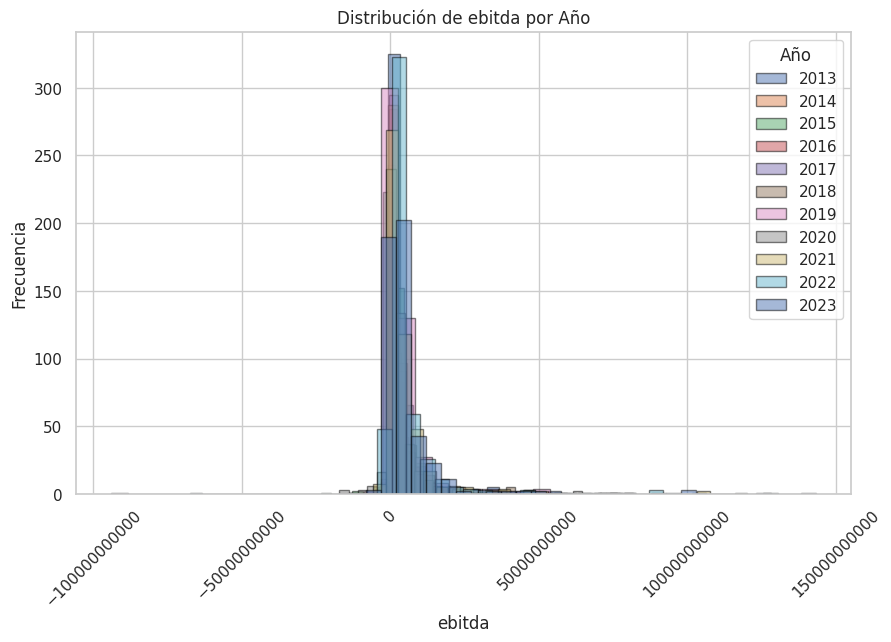

In [ ]:
# ebitda por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['ebitda'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de ebitda por Año')
plt.xlabel('ebitda')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

Visualizamos los registros con ebitda <0. En este caso, es posible a nivel de negocio que un ebitda sea negativo.

In [ ]:
df[df['ebitda']<-50000000000]

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
1178,CRWD,2019,489971000.0000000000,487000.0000000000,-93976000000.0000000000,-140007000000.0000000000,88408000.0000000000,363100000.0000000000,-487793000.0000000000,47421000.0000000000,...,110588000.0000000000,-560587000.0000000000,0.0000000000,391790500.0000000000,22968000.0000000000,49.8700000000,Information Technology,433219000.0000000000,331388000.0000000000,281420000.0000000000
2078,GE,2013,113245000000.0000000000,1711000000.0000000000,-67321000000.0000000000,13057000000.0000000000,132500000000.0000000000,519777000000.0000000000,130566000000.0000000000,10060881000.0000000000,...,13458000000.0000000000,29117000000.0000000000,7821000000.0000000000,-45575000000.0000000000,28510000000.0000000000,111.7493745247,Industrials,663247000000.0000000000,38713000000.0000000000,109962000000.0000000000


In [ ]:
df[df['ticker']=='GE']

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
2078,GE,2013,113245000000.0000000000,1711000000.0000000000,-67321000000.0000000000,13057000000.0000000000,132500000000.0000000000,519777000000.0000000000,130566000000.0000000000,10060881000.0000000000,...,13458000000.0000000000,29117000000.0000000000,7821000000.0000000000,-45575000000.0000000000,28510000000.0000000000,111.7493745247,Industrials,663247000000.0000000000,38713000000.0000000000,109962000000.0000000000
2079,GE,2014,117184000000.0000000000,1789000000.0000000000,45353000000.0000000000,15233000000.0000000000,138100000000.0000000000,518023000000.0000000000,128159000000.0000000000,10057380000.0000000000,...,13727000000.0000000000,-5034000000.0000000000,8851000000.0000000000,-16956000000.0000000000,27709000000.0000000000,104.2636770905,Industrials,653931000000.0000000000,41081000000.0000000000,71581000000.0000000000
2080,GE,2015,117386000000.0000000000,1505000000.0000000000,-10408000000.0000000000,-6126000000.0000000000,70483000000.0000000000,389961000000.0000000000,98274000000.0000000000,9379288000.0000000000,...,7309000000.0000000000,59488000000.0000000000,9295000000.0000000000,-76054000000.0000000000,19891000000.0000000000,132.9767661527,Industrials,493071000000.0000000000,73154000000.0000000000,89336000000.0000000000
2081,GE,2016,119469000000.0000000000,2073000000.0000000000,-5117000000.0000000000,7500000000.0000000000,48129000000.0000000000,284668000000.0000000000,70162000000.0000000000,8742614000.0000000000,...,7199000000.0000000000,49135000000.0000000000,8806000000.0000000000,-90464000000.0000000000,1160000000.0000000000,139.0799723381,Industrials,359122000000.0000000000,47873000000.0000000000,64820000000.0000000000
2082,GE,2017,99279000000.0000000000,2290000000.0000000000,-17193000000.0000000000,-8484000000.0000000000,43299000000.0000000000,292355000000.0000000000,56031000000.0000000000,8680571000.0000000000,...,7920000000.0000000000,5379000000.0000000000,8650000000.0000000000,-18484000000.0000000000,6554000000.0000000000,79.3837528710,Industrials,369245000000.0000000000,108245000000.0000000000,69052000000.0000000000
2083,GE,2018,97012000000.0000000000,2662000000.0000000000,35039000000.0000000000,-22355000000.0000000000,30736000000.0000000000,259591000000.0000000000,30981000000.0000000000,8702227000.0000000000,...,8056000000.0000000000,18280000000.0000000000,4474000000.0000000000,-31806000000.0000000000,4978000000.0000000000,35.4137641234,Industrials,311072000000.0000000000,53208000000.0000000000,50704000000.0000000000
2084,GE,2019,90221000000.0000000000,1569000000.0000000000,-7769000000.0000000000,-4979000000.0000000000,35222000000.0000000000,235316000000.0000000000,28316000000.0000000000,8738434000.0000000000,...,6095000000.0000000000,8977000000.0000000000,649000000.0000000000,-16133000000.0000000000,8734000000.0000000000,54.4827205719,Industrials,265177000000.0000000000,103096000000.0000000000,78865000000.0000000000
2085,GE,2020,75833000000.0000000000,1382000000.0000000000,-1427000000.0000000000,5704000000.0000000000,36119000000.0000000000,219138000000.0000000000,35552000000.0000000000,8765493000.0000000000,...,3403000000.0000000000,16671000000.0000000000,648000000.0000000000,-19852000000.0000000000,3568000000.0000000000,52.9982569157,Industrials,256211000000.0000000000,84853000000.0000000000,54613000000.0000000000
2086,GE,2021,74196000000.0000000000,1138000000.0000000000,47287000000.0000000000,-6520000000.0000000000,15100000000.0000000000,157262000000.0000000000,40310000000.0000000000,1099027213.0000000000,...,1361000000.0000000000,21308000000.0000000000,575000000.0000000000,-45177000000.0000000000,3332000000.0000000000,58.1314830424,Industrials,198874000000.

**TRANSFORMACIÓN**

In [ ]:
ebitda_ge = {
    2013: 33630000000,
    2014: 27740000000,
    2015: 27720000000,
    2016: 25180000000,
    2017: 22230000000,
    2018: 16650000000,
    2019: 7090000000,
    2020: 2830000000,
    2021: 2290000000,
    2022: 4420000000,
    2023: 8540000000
}

# iteramos sobre el diccionario y actualizamos la columna ebitda donde este nula para cada año

for year, ebitda in ebitda_ge.items():
    # Condición: ticker es 'AEP', el año es el que nos interesa y 'totalrevenue' es 0
    condition = (df['ticker'] == 'GE') & (df['year'] == year)
    df.loc[condition, 'ebitda'] = ebitda

In [ ]:
df[df['ebitda']==0]

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities


**NET INCOME**

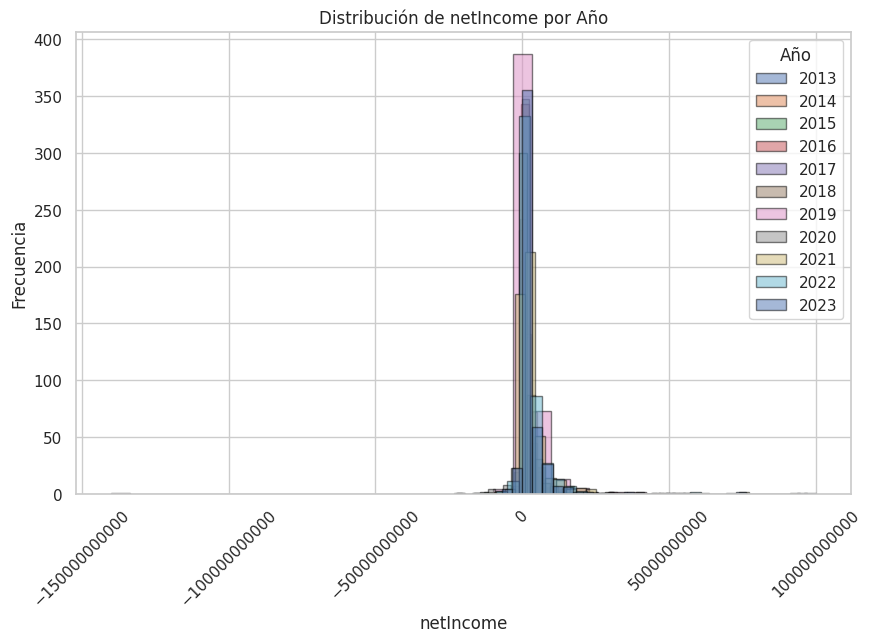

In [ ]:
# netIncome por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['netIncome'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de netIncome por Año')
plt.xlabel('netIncome')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

In [ ]:
df[df['netIncome']==0]

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
4797,TXN,2013,12205000000.0000000000,336000000.0000000000,521000000.0000000000,0.0000000000,1627000000.0000000000,8131000000.0000000000,-19790000000.0000000000,1086000000.0000000000,...,412000000.0000000000,-3000000.0000000000,1175000000.0000000000,-3170000000.0000000000,3384000000.0000000000,32.6513359927,Information Technology,18938000000.0000000000,8019000000.0000000000,2747000000.0000000000
5034,VTRS,2019,11500500000.0000000000,1582700000.0000000000,2237600000.0000000000,0.0000000000,475600000.0000000000,19371700000.0000000000,0.0000000000,100.0000000000,...,213200000.0000000000,-525400000.0000000000,300000.0000000000,-1169000000.0000000000,1803700000.0000000000,58.2000000000,Health Care,31255500000.0000000000,6757300000.0000000000,5569100000.0000000000


In [ ]:
# eliminamos estas empresas y estos años en concreto, ya que es el primer año que empezaban a cotizas y aun no hay información completa de los financieros

df = df[~((df['ticker'] == 'TXN') & (df['year'] == 2013))]

df = df[~((df['ticker'] == 'VTRS') & (df['year'] == 2019))]

**cashAndCashEquivalentsAtCarryingValue**

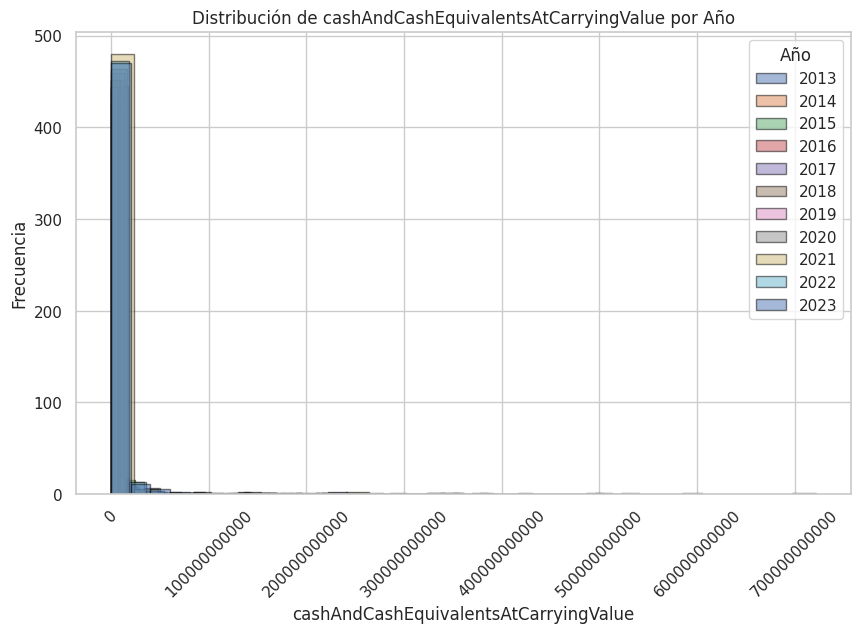

In [ ]:
# cashAndCashEquivalentsAtCarryingValue por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['cashAndCashEquivalentsAtCarryingValue'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de cashAndCashEquivalentsAtCarryingValue por Año')
plt.xlabel('cashAndCashEquivalentsAtCarryingValue')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

In [ ]:
df[df['cashAndCashEquivalentsAtCarryingValue']<0]

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities


In [ ]:
# apple tiene un valor muy alto de cash, pero es correcto
df[df['cashAndCashEquivalentsAtCarryingValue']>4000000000]

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
11,AAPL,2013,170774000000.0000000000,5800000000.0000000000,56091000000.0000000000,37037000000.0000000000,14259000000.0000000000,83451000000.0000000000,123549000000.0000000000,899213000.0000000000,...,8165000000.0000000000,-33774000000.0000000000,10528000000.0000000000,-16379000000.0000000000,53666000000.0000000000,17.4798465170,Information Technology,207000000000.0000000000,73286000000.0000000000,43658000000.0000000000
12,AAPL,2014,182411000000.0000000000,6900000000.0000000000,60767000000.0000000000,39510000000.0000000000,13844000000.0000000000,120292000000.0000000000,111547000000.0000000000,5866161000.0000000000,...,9571000000.0000000000,-22579000000.0000000000,11031000000.0000000000,-37549000000.0000000000,109133000000.0000000000,24.5797299089,Information Technology,231839000000.0000000000,68531000000.0000000000,63448000000.0000000000
13,AAPL,2015,232982000000.0000000000,9200000000.0000000000,82448000000.0000000000,53394000000.0000000000,21120000000.0000000000,170990000000.0000000000,119355000000.0000000000,5578753000.0000000000,...,11488000000.0000000000,-56274000000.0000000000,11561000000.0000000000,-17716000000.0000000000,81266000000.0000000000,23.8379294300,Information Technology,290345000000.0000000000,89378000000.0000000000,80610000000.0000000000
14,AAPL,2016,215639000000.0000000000,8300000000.0000000000,71128000000.0000000000,45687000000.0000000000,20484000000.0000000000,193437000000.0000000000,128249000000.0000000000,5336166000.0000000000,...,13548000000.0000000000,-45977000000.0000000000,12150000000.0000000000,-20890000000.0000000000,66231000000.0000000000,26.8131097420,Information Technology,321686000000.0000000000,106869000000.0000000000,79006000000.0000000000
15,AAPL,2017,229234000000.0000000000,1200000000.0000000000,67612000000.0000000000,48351000000.0000000000,20289000000.0000000000,241272000000.0000000000,134047000000.0000000000,5126201000.0000000000,...,12795000000.0000000000,-46446000000.0000000000,12769000000.0000000000,-17974000000.0000000000,64225000000.0000000000,39.8108623303,Information Technology,375319000000.0000000000,128645000000.0000000000,100814000000.0000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5233,XOM,2014,394105000000.0000000000,17297000000.0000000000,51379000000.0000000000,32520000000.0000000000,4616000000.0000000000,168429000000.0000000000,174399000000.0000000000,4201000000.0000000000,...,32952000000.0000000000,-26975000000.0000000000,11816000000.0000000000,-17888000000.0000000000,89728000000.0000000000,59.7354482620,Energy,349493000000.0000000000,52910000000.0000000000,64633000000.0000000000
5239,XOM,2020,181502000000.0000000000,20709000000.0000000000,-7016000000.0000000000,-22440000000.0000000000,4364000000.0000000000,168620000000.0000000000,157150000000.0000000000,4233000000.0000000000,...,17282000000.0000000000,-18459000000.0000000000,15053000000.0000000000,5285000000.0000000000,14668000000.0000000000,34.9153438412,Energy,332750000000.0000000000,44893000000.0000000000,56363000000.0000000000
5240,XOM,2021,285640000000.0000000000,20607000000.0000000000,52788000000.0000000000,23040000000.0000000000,6802000000.0000000000,163240000000.0000000000,168577000000.0000000000,4239000000.0000000000,...,12076000000.0000000000,-10235000000.0000000000,15148000000.0000000000,-35423000000.0000000000,48129000000.0000000000,55.0412409064,Energy,338923000000.0000000000,59154000000.0000000000,56643000000.0000000000
5241,XOM,2022,413680000000.0000000000,24040000000.0000000000,102591000000.0000000000,55740000000.0000000000,29640000000.0000000000,166594000000.0000000000,195049000000.0000000000,4082000000.000

**totalLiabilities**     

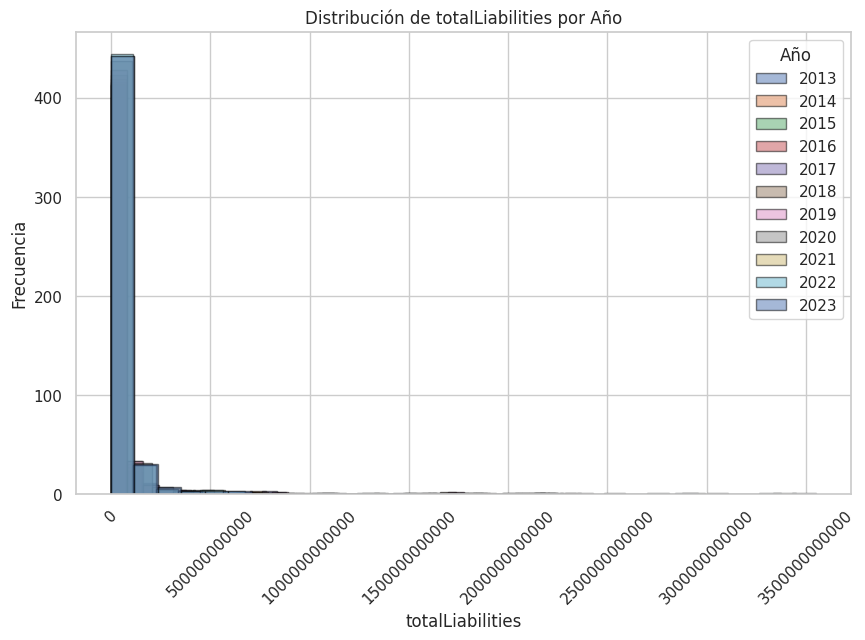

In [ ]:
# totalLiabilities por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['totalLiabilities'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de totalLiabilities por Año')
plt.xlabel('totalLiabilities')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

In [ ]:
df[df['totalLiabilities']<0]

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities


In [ ]:
df[df['totalLiabilities']>15000000000] # apple tiene unos pasivos muy elevados (obligaciones financieras) como deuda a alargo plazo, cuentas por pagar, pasivos diferidos etc

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
11,AAPL,2013,170774000000.0000000000,5800000000.0000000000,56091000000.0000000000,37037000000.0000000000,14259000000.0000000000,83451000000.0000000000,123549000000.0000000000,899213000.0000000000,...,8165000000.0000000000,-33774000000.0000000000,10528000000.0000000000,-16379000000.0000000000,53666000000.0000000000,17.4798465170,Information Technology,207000000000.0000000000,73286000000.0000000000,43658000000.0000000000
12,AAPL,2014,182411000000.0000000000,6900000000.0000000000,60767000000.0000000000,39510000000.0000000000,13844000000.0000000000,120292000000.0000000000,111547000000.0000000000,5866161000.0000000000,...,9571000000.0000000000,-22579000000.0000000000,11031000000.0000000000,-37549000000.0000000000,109133000000.0000000000,24.5797299089,Information Technology,231839000000.0000000000,68531000000.0000000000,63448000000.0000000000
13,AAPL,2015,232982000000.0000000000,9200000000.0000000000,82448000000.0000000000,53394000000.0000000000,21120000000.0000000000,170990000000.0000000000,119355000000.0000000000,5578753000.0000000000,...,11488000000.0000000000,-56274000000.0000000000,11561000000.0000000000,-17716000000.0000000000,81266000000.0000000000,23.8379294300,Information Technology,290345000000.0000000000,89378000000.0000000000,80610000000.0000000000
14,AAPL,2016,215639000000.0000000000,8300000000.0000000000,71128000000.0000000000,45687000000.0000000000,20484000000.0000000000,193437000000.0000000000,128249000000.0000000000,5336166000.0000000000,...,13548000000.0000000000,-45977000000.0000000000,12150000000.0000000000,-20890000000.0000000000,66231000000.0000000000,26.8131097420,Information Technology,321686000000.0000000000,106869000000.0000000000,79006000000.0000000000
15,AAPL,2017,229234000000.0000000000,1200000000.0000000000,67612000000.0000000000,48351000000.0000000000,20289000000.0000000000,241272000000.0000000000,134047000000.0000000000,5126201000.0000000000,...,12795000000.0000000000,-46446000000.0000000000,12769000000.0000000000,-17974000000.0000000000,64225000000.0000000000,39.8108623303,Information Technology,375319000000.0000000000,128645000000.0000000000,100814000000.0000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5240,XOM,2021,285640000000.0000000000,20607000000.0000000000,52788000000.0000000000,23040000000.0000000000,6802000000.0000000000,163240000000.0000000000,168577000000.0000000000,4239000000.0000000000,...,12076000000.0000000000,-10235000000.0000000000,15148000000.0000000000,-35423000000.0000000000,48129000000.0000000000,55.0412409064,Energy,338923000000.0000000000,59154000000.0000000000,56643000000.0000000000
5241,XOM,2022,413680000000.0000000000,24040000000.0000000000,102591000000.0000000000,55740000000.0000000000,29640000000.0000000000,166594000000.0000000000,195049000000.0000000000,4082000000.0000000000,...,18407000000.0000000000,-14742000000.0000000000,15206000000.0000000000,-39114000000.0000000000,76797000000.0000000000,103.1226885161,Energy,369067000000.0000000000,97631000000.0000000000,69045000000.0000000000
5242,XOM,2023,344582000000.0000000000,20641000000.0000000000,74273000000.0000000000,36010000000.0000000000,31539000000.0000000000,163779000000.0000000000,204802000000.0000000000,3971000000.0000000000,...,21919000000.0000000000,-19274000000.0000000000,15472000000.0000000000,-34297000000.0000000000,55369000000.0000000000,96.6842763285,Energy,376317000000.0000000000,96609000000.0000000000,65316000000.0000000000
5267,ZBH,2015,5711100000.0000000000,337400000.0000000000,778000000.0000000000,147000000.0000000000,1459300000.0000000000,17271200000.0000000000,9887900000.0000000000,203300000.0000000000,.

**totalShareholderEquity**

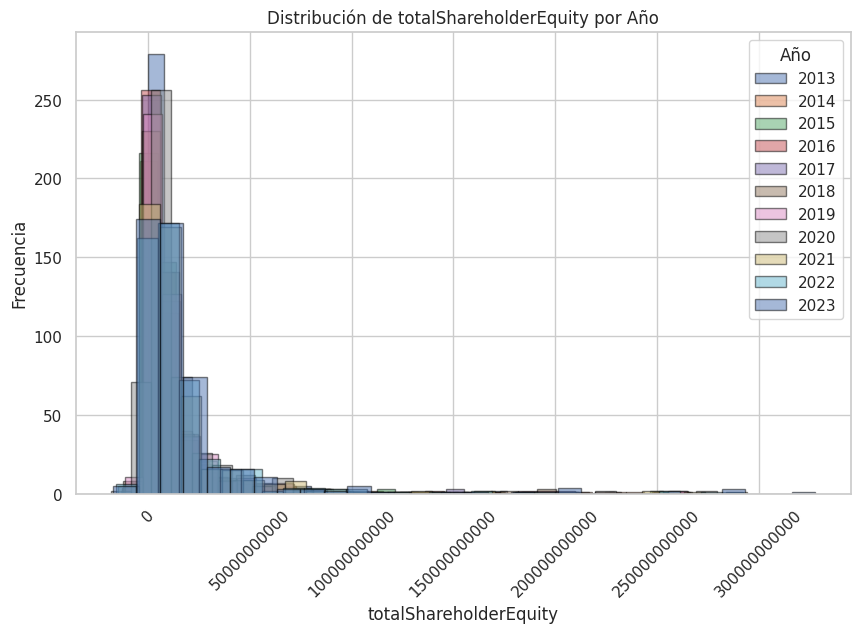

In [ ]:
# totalShareholderEquity por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['totalShareholderEquity'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de totalShareholderEquity por Año')
plt.xlabel('totalShareholderEquity')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

In [ ]:
# si el pasivo es mayor que el activo, el patrimonio neto de los accionistas puede ser negativo (perdidas acumuladas, excesiva deuda, cambios en la valoración de los activos etc)

**commonStockSharesOutstanding**

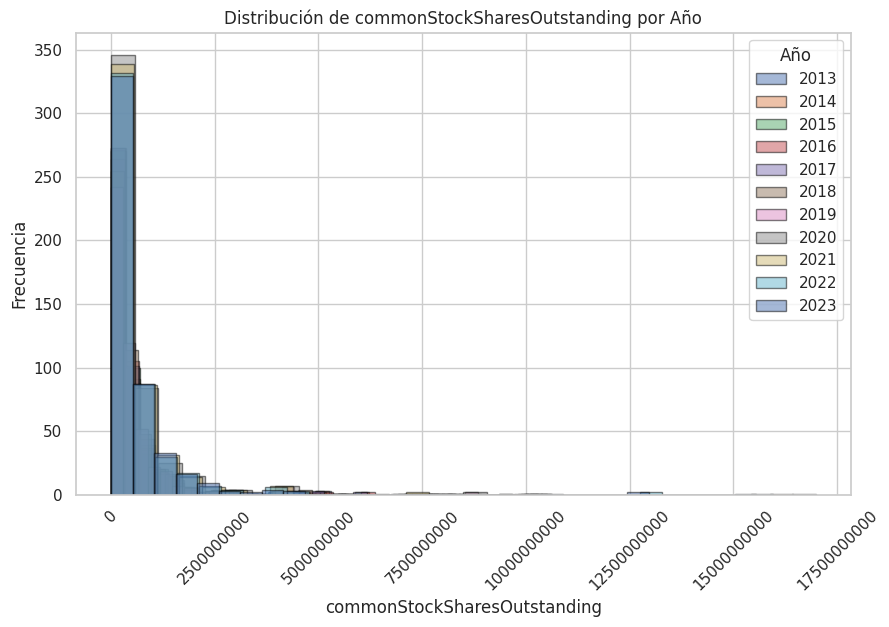

In [ ]:
# commonStockSharesOutstanding por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['commonStockSharesOutstanding'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de commonStockSharesOutstanding por Año')
plt.xlabel('commonStockSharesOutstanding')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

In [ ]:
df[df['commonStockSharesOutstanding']>10000000000]

,ticker,year,totalRevenue,depreciationAndAmortization,ebitda,netIncome,cashAndCashEquivalentsAtCarryingValue,totalLiabilities,totalShareholderEquity,commonStockSharesOutstanding,...,capitalExpenditures,cashflowFromInvestment,dividendPayout,cashflowFromFinancing,operatingCashflow,Year-End Price,sector,totalAssets,totalCurrentAssets,totalCurrentLiabilities
18,AAPL,2020,271642000000.0000000000,11056000000.0000000000,77344000000.0000000000,57411000000.0000000000,38016000000.0000000000,258549000000.0000000000,65339000000.0000000000,16976763000.0000000000,...,7309000000.0000000000,-4289000000.0000000000,14081000000.0000000000,-86820000000.0000000000,80674000000.0000000000,129.7556313540,Information Technology,323888000000.0000000000,143713000000.0000000000,105392000000.0000000000
19,AAPL,2021,363172000000.0000000000,11284000000.0000000000,120233000000.0000000000,94680000000.0000000000,34940000000.0000000000,287912000000.0000000000,63090000000.0000000000,16426786000.0000000000,...,11085000000.0000000000,-14545000000.0000000000,14467000000.0000000000,-93353000000.0000000000,104038000000.0000000000,174.7131909337,Information Technology,351002000000.0000000000,134836000000.0000000000,125481000000.0000000000
20,AAPL,2022,391397000000.0000000000,11104000000.0000000000,130541000000.0000000000,99803000000.0000000000,23646000000.0000000000,302083000000.0000000000,50672000000.0000000000,15943425000.0000000000,...,10708000000.0000000000,-22354000000.0000000000,14841000000.0000000000,-110749000000.0000000000,122151000000.0000000000,128.5816426389,Information Technology,352755000000.0000000000,135405000000.0000000000,153982000000.0000000000
21,AAPL,2023,379352000000.0000000000,11519000000.0000000000,125820000000.0000000000,96995000000.0000000000,29965000000.0000000000,290437000000.0000000000,62146000000.0000000000,15550061000.0000000000,...,10959000000.0000000000,3705000000.0000000000,15025000000.0000000000,-108488000000.0000000000,110543000000.0000000000,191.5919042207,Information Technology,352583000000.0000000000,143566000000.0000000000,145308000000.0000000000
341,AMZN,2022,511276000000.0000000000,6704000000.0000000000,3132000000.0000000000,-2722000000.0000000000,53888000000.0000000000,316632000000.0000000000,146043000000.0000000000,10242000000.0000000000,...,63645000000.0000000000,-37601000000.0000000000,0.0000000000,9718000000.0000000000,46752000000.0000000000,84.0000000000,Consumer Discretionary,462675000000.0000000000,146791000000.0000000000,155393000000.0000000000
342,AMZN,2023,571668000000.0000000000,6606000000.0000000000,47313000000.0000000000,30425000000.0000000000,73387000000.0000000000,325979000000.0000000000,201875000000.0000000000,10383000000.0000000000,...,52729000000.0000000000,-49833000000.0000000000,0.0000000000,-15879000000.0000000000,84946000000.0000000000,151.9400000000,Consumer Discretionary,527854000000.0000000000,172351000000.0000000000,164917000000.0000000000
537,BAC,2013,88942000000.0000000000,2683000000.0000000000,31610000000.0000000000,11431000000.0000000000,131322000000.0000000000,1869588000000.0000000000,232475000000.0000000000,10591808296.0000000000,...,521000000.0000000000,25058000000.0000000000,1677000000.0000000000,-95442000000.0000000000,92817000000.0000000000,12.5539767237,Financials,2102273000000.0000000000,131322000000.0000000000,45999000000.0000000000
538,BAC,2014,85894000000.0000000000,936000000.0000000000,19834000000.0000000000,5520000000.0000000000,138589000000.0000000000,1861063000000.0000000000,243476000000.0000000000,10516542476.0000000000,...,1160000000.0000000000,-4204000000.0000000000,2306000000.0000000000,-12201000000.0000000000,34965000000.0000000000,14.5290258139,Financials,2104534000000.0000000000,343210000000.0000000000,232435000000.0000000000
539,BAC,2015,82965000000.0000000000,834000000.0000000000,33570000000.0000000000,15910000000.0000000000,159353000000.0000000000,1888111000000.0000000000,255615000000.0000000000,10380265063.0000000000,...,840500000.0000000000,-54954000000.0000000000,35740

In [ ]:
df[df['ticker']=='STX'][['year', 'commonStockSharesOutstanding']]

,year,commonStockSharesOutstanding
4457,2013,359437036.0000000000
4458,2014,326539322.0000000000
4459,2015,315445536.0000000000
4460,2016,298572217.0000000000
4461,2017,291799561.0000000000
4462,2018,287170363.0000000000
4463,2019,269097971.0000000000
4464,2020,256718840.0000000000
4465,2021,227382980.0000000000
4466,2022,209850169.0000000000


In [ ]:
# imputo el valor outlier manualmente
condition = (df['ticker'] == 'STX') & (df['year'] == 2014)
df.loc[condition, 'commonStockSharesOutstanding'] = 326539322

In [ ]:
df[df['ticker']=='YUM'][['year', 'commonStockSharesOutstanding']]

,year,commonStockSharesOutstanding
5254,2013,449000000.0000000000
5255,2014,441000000.0000000000
5256,2015,433000000.0000000000
5257,2016,364000000.0000000000
5258,2017,335000000.0000000000
5259,2018,313000000.0000000000
5260,2019,303000000.0000000000
5261,2020,302000000.0000000000
5262,2021,294000000.0000000000
5263,2022,283000000.0000000000


In [ ]:
# imputo el valor outlier manualmente
condition = (df['ticker'] == 'YUM') & (df['year'] == 2015)
df.loc[condition, 'commonStockSharesOutstanding'] = 433000000

In [ ]:
df[df['ticker']=='GRMN'][['year', 'commonStockSharesOutstanding']]

,year,commonStockSharesOutstanding
2213,2013,195150102.0000000000
2214,2014,191815000.0000000000
2215,2015,189722000.0000000000
2216,2016,188565000.0000000000
2217,2017,188189000.0000000000
2218,2018,189461000.0000000000
2219,2019,190686000.0000000000
2220,2020,191571000.0000000000
2221,2021,192608000.0000000000
2222,2022,191623000.0000000000


In [ ]:
# imputo el valor outlier manualmente
condition = (df['ticker'] == 'GRMN') & (df['year'] == 2015)
df.loc[condition, 'commonStockSharesOutstanding'] = 189722000

In [ ]:
# imputo el valor outlier manualmente
condition = (df['ticker'] == 'GRMN') & (df['year'] == 2017)
df.loc[condition, 'commonStockSharesOutstanding'] = 188189000

In [ ]:
df[df['ticker']=='KO'][['year', 'commonStockSharesOutstanding']]

,year,commonStockSharesOutstanding
2865,2013,4410000000.0000000000
2866,2014,4372000000.0000000000
2867,2015,4337000000.0000000000
2868,2016,4302000000.0000000000
2869,2017,4263000000.0000000000
2870,2018,4275000000.0000000000
2871,2019,4285000000.0000000000
2872,2020,4301000000.0000000000
2873,2021,4321000000.0000000000
2874,2022,4325000000.0000000000


In [ ]:
# imputo el valor outlier manualmente
condition = (df['ticker'] == 'KO') & (df['year'] == 2018)
df.loc[condition, 'commonStockSharesOutstanding'] = 4275000000

**shortLongTermDebtTotal**

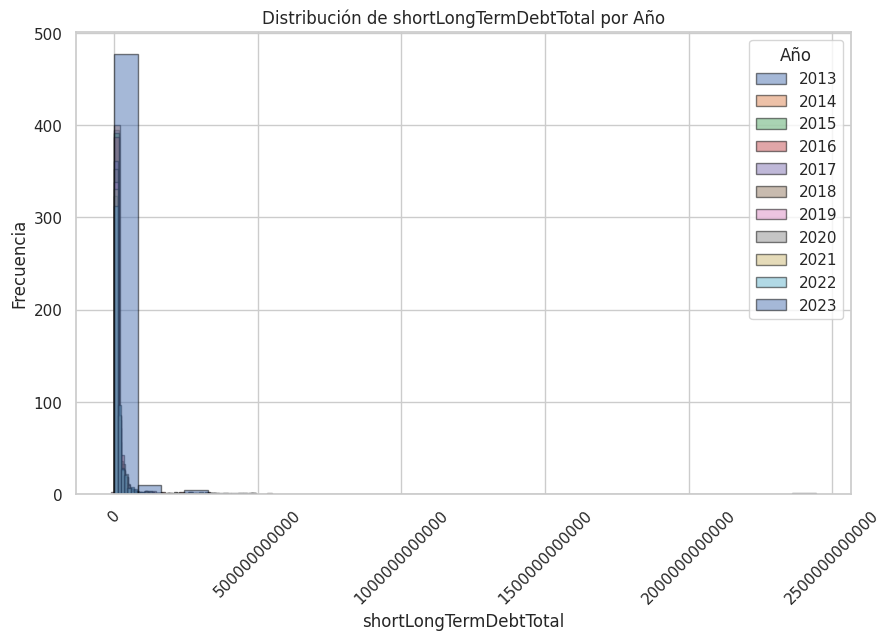

In [ ]:
# shortLongTermDebtTotal por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['shortLongTermDebtTotal'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de shortLongTermDebtTotal por Año')
plt.xlabel('shortLongTermDebtTotal')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

In [ ]:
df[df['shortLongTermDebtTotal']<0][['ticker', 'shortLongTermDebtTotal']]

,ticker,shortLongTermDebtTotal
35,ABNB,-13000000.0000000000
472,AVY,-700000.0000000000
473,AVY,-500000.0000000000
474,AVY,-400000.0000000000
475,AVY,-700000.0000000000
...,...,...
5138,WM,-52000000.0000000000
5267,ZBH,-12400000.0000000000
5268,ZBH,-29000000.0000000000
5269,ZBH,-26000000.0000000000


In [ ]:
df[df['shortLongTermDebtTotal']>500000000000][['ticker', 'shortLongTermDebtTotal']]

,ticker,shortLongTermDebtTotal
558,BALL,2442288000000.0000000000
2736,JPM,548714000000.0000000000


In [ ]:
df[df['ticker']=='BALL'][['year', 'shortLongTermDebtTotal']]

,year,shortLongTermDebtTotal
548,2013,3547800000.0000000000
549,2014,3048800000.0000000000
550,2015,5051400000.0000000000
551,2016,7532000000.0000000000
552,2017,6971000000.0000000000
553,2018,6729000000.0000000000
554,2019,7817000000.0000000000
555,2020,15547000000.0000000000
556,2021,15391000000.0000000000
557,2022,17083000000.0000000000


In [ ]:
# imputo el valor outlier manualmente
condition = (df['ticker'] == 'BALL') & (df['year'] == 2023)
df.loc[condition, 'shortLongTermDebtTotal'] = 17783000000

In [ ]:
# este tiene buena pinta
df[df['ticker']=='JPM'][['year', 'shortLongTermDebtTotal']]

,year,shortLongTermDebtTotal
2735,2013,246207000000.0000000000
2736,2014,548714000000.0000000000
2737,2015,462955000000.0000000000
2738,2016,483666000000.0000000000
2739,2017,335901000000.0000000000
2740,2018,351322000000.0000000000
2741,2019,332403000000.0000000000
2742,2020,326891000000.0000000000
2743,2021,354595000000.0000000000
2744,2022,339926000000.0000000000


**capitalExpenditures**

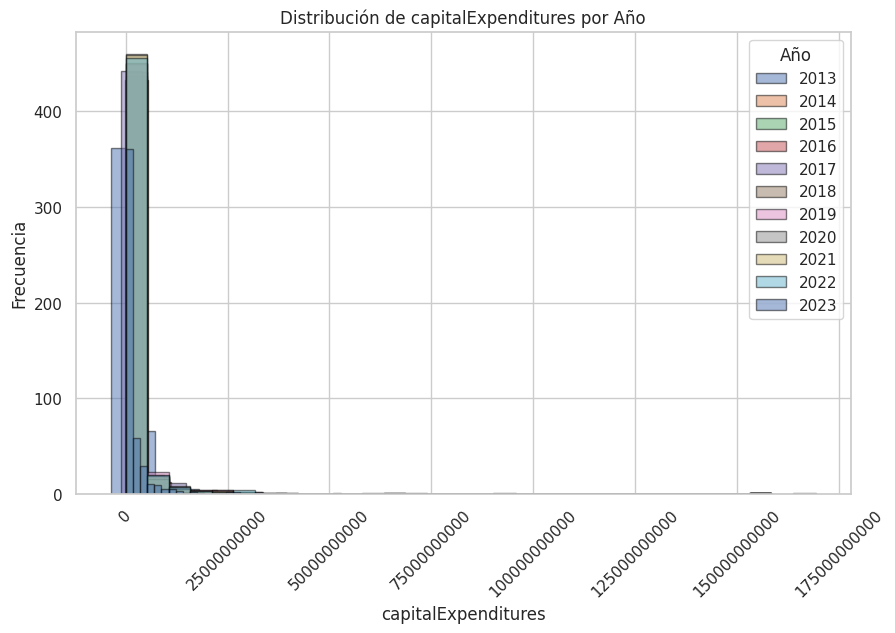

In [ ]:
# capitalExpenditures por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['capitalExpenditures'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de capitalExpenditures por Año')
plt.xlabel('capitalExpenditures')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

*CapEx representa el gasto de capital en la adquisición, mejora o mantenimiento de activos fijos, como maquinaria, edificios o infraestructura. En los flujos de efectivo (Cash Flow Statement), este gasto se refleja en la sección de "cash flows from investing activities" y suele mostrarse como un valor negativo porque representa una salida de efectivo. Pero en algunos casos podria ser positivo. En este caso vemos que la mayoria estan reflejadas en positivo*

**cashflowFromInvestment**

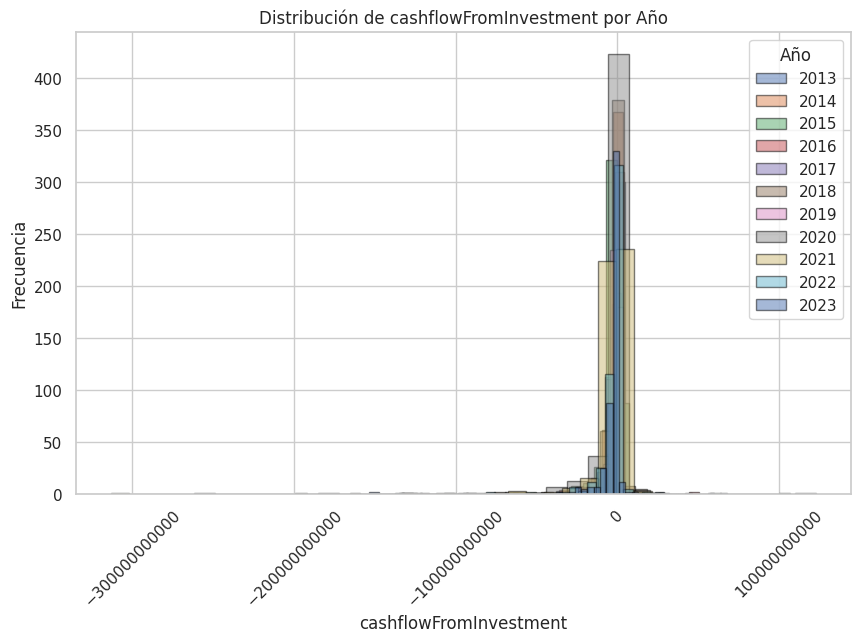

In [ ]:
# cashflowFromInvestment por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['cashflowFromInvestment'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de cashflowFromInvestment por Año')
plt.xlabel('cashflowFromInvestment')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

**operatingCashflow**

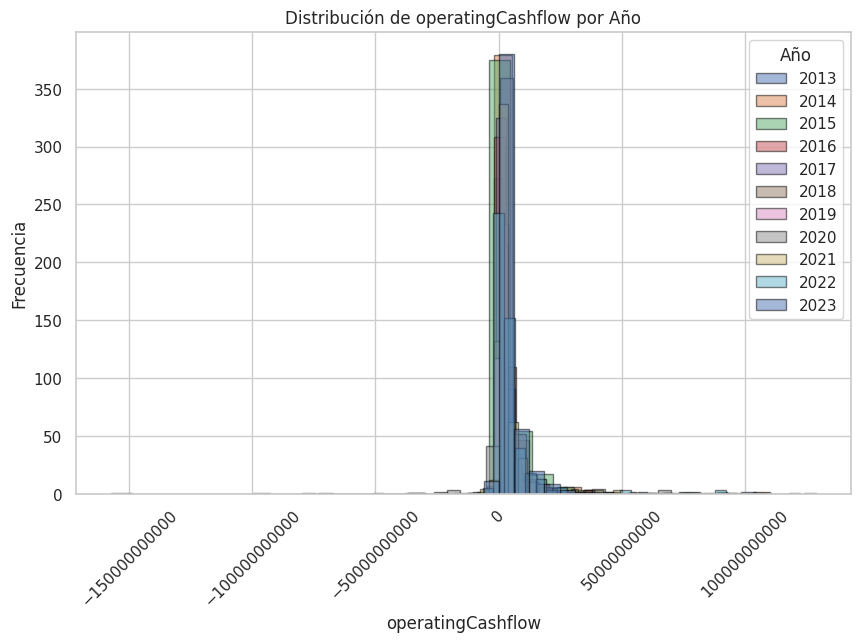

In [ ]:
# operatingCashflow por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['operatingCashflow'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de operatingCashflow por Año')
plt.xlabel('operatingCashflow')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

**sector**

In [ ]:
df['sector'].value_counts()

,count
sector,
Industrials,800
Financials,780
Information Technology,734
Health Care,639
Consumer Discretionary,540
Consumer Staples,378
Real Estate,335
Utilities,325
Materials,274


**totalAssets**                            

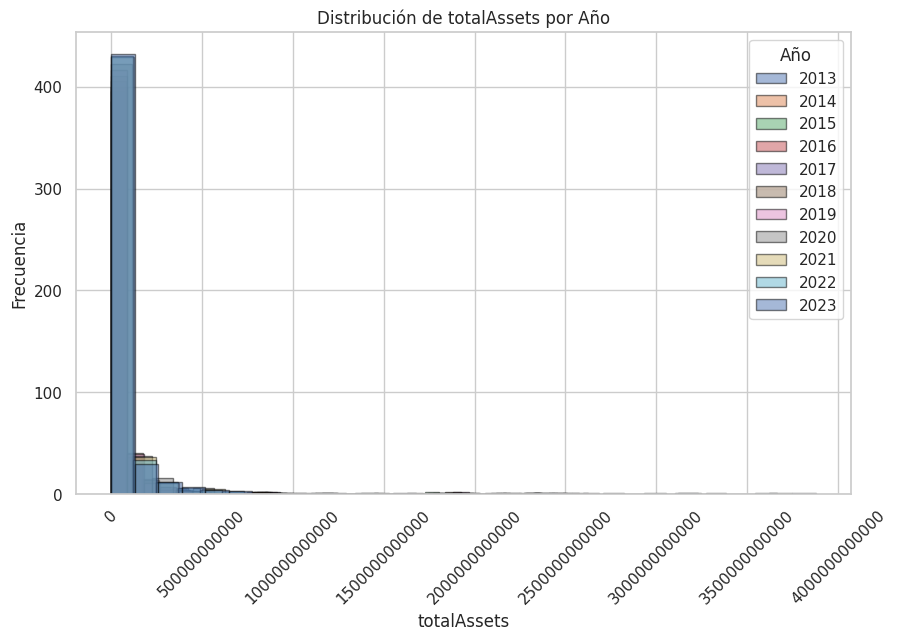

In [ ]:
# totalAssets por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['totalAssets'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de totalAssets por Año')
plt.xlabel('totalAssets')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

**totalCurrentAssets**

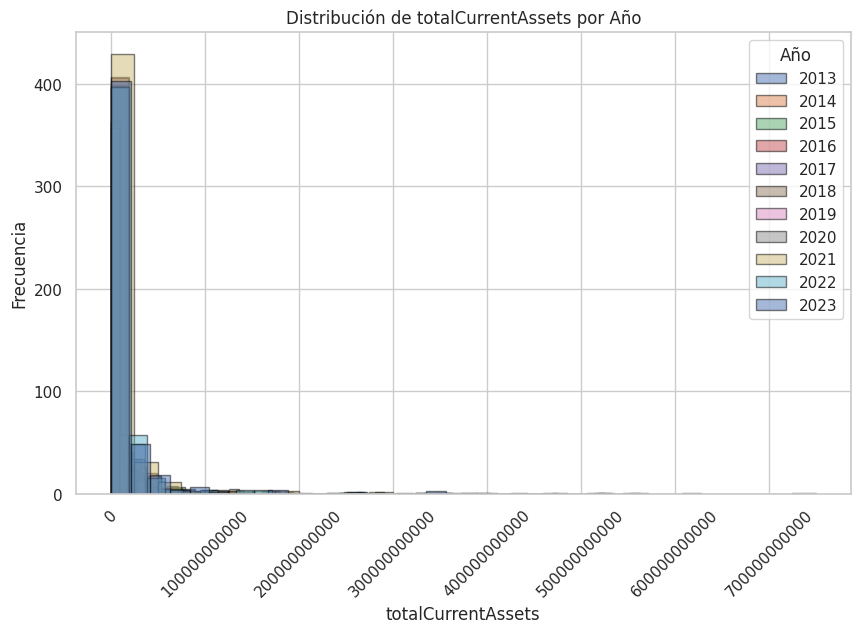

In [ ]:
# totalCurrentAssets por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['totalCurrentAssets'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de totalCurrentAssets por Año')
plt.xlabel('totalCurrentAssets')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

**totalCurrentLiabilities**

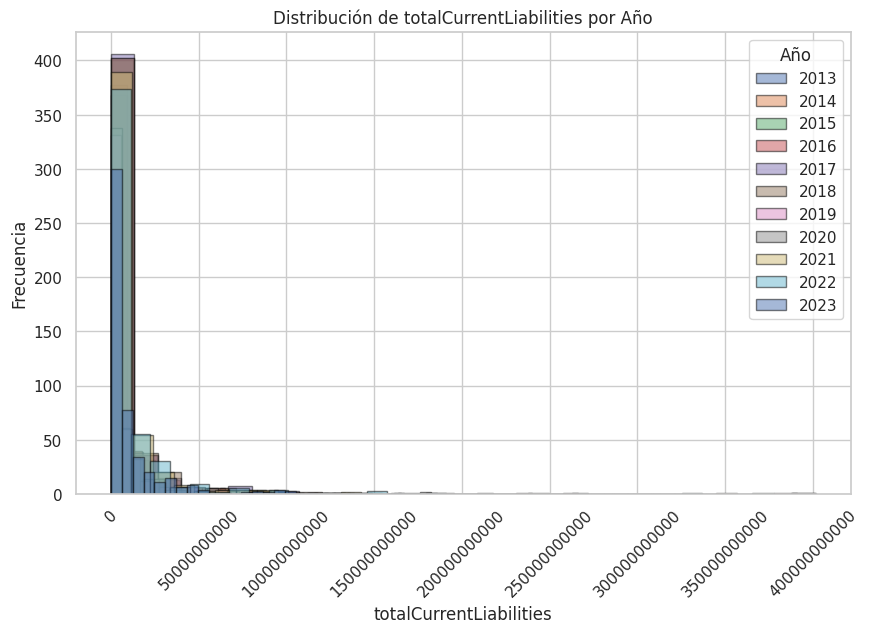

In [ ]:
# totalCurrentLiabilities por año

# creacion grafico distribución por cada año
plt.figure(figsize=(10,6))
for year in df['year'].unique():
  subset = df[df['year'] == year]
  plt.hist(subset['totalCurrentLiabilities'], bins =30, edgecolor='black', alpha=0.5, label=str(year))

plt.title('Distribución de totalCurrentLiabilities por Año')
plt.xlabel('totalCurrentLiabilities')
plt.ylabel('Frecuencia')
plt.legend(title='Año')


plt.ticklabel_format(style='plain', axis='both')  # 'both' para eje x e y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas para mejor legibilidad
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5257 entries, 0 to 5297
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   ticker                                 5257 non-null   object 
 1   year                                   5257 non-null   int64  
 2   totalRevenue                           5257 non-null   float64
 3   depreciationAndAmortization            5257 non-null   float64
 4   ebitda                                 5257 non-null   float64
 5   netIncome                              5257 non-null   float64
 6   cashAndCashEquivalentsAtCarryingValue  5257 non-null   float64
 7   totalLiabilities                       5257 non-null   float64
 8   totalShareholderEquity                 5257 non-null   float64
 9   commonStockSharesOutstanding           5257 non-null   float64
 10  shortLongTermDebtTotal                 5257 non-null   float64
 11  capitalEx

In [ ]:
ruta_guardado_pkl = '/content/drive/MyDrive/ACADEMIC/MASTER DATA SCIENCE & AI (NUCLIO DIGITAL SCHOOL)/TFM/TFM SP500 COMPARTIDO/DATA_HIST/df_sp500_sin_nulos_sin_outliers_10022025.pkl'

In [ ]:
#df.to_pickle(ruta_guardado_pkl)